In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import gensim

from gensim.models import Word2Vec
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import re
import nltk
from tensorflow.keras.utils import to_categorical

In [2]:
data = pd.read_csv("data/news_class.csv")

In [3]:
df = data.copy() # to be safe and avoid errors

In [4]:
df = df.loc[:,["data_id" , "content" , "category_level_1" , "category_level_2"]]

In [5]:
df.groupby(['category_level_1'])['data_id'].agg('count')

category_level_1
arts, culture, entertainment and media        300
conflict, war and peace                       800
crime, law and justice                        500
disaster, accident and emergency incident     500
economy, business and finance                 400
education                                     607
environment                                   600
health                                        700
human interest                                600
labour                                        703
lifestyle and leisure                         300
politics                                      900
religion and belief                           800
science and technology                        800
society                                      1100
sport                                         907
weather                                       400
Name: data_id, dtype: int64

In [6]:
def labeler(dataframe_column):
    encoder=LabelEncoder()
    
    labels = encoder.fit_transform(dataframe_column)
    print(encoder.classes_)
    print("We did it boys , labels have been created")
    
    return(pd.DataFrame(labels))

In [7]:
# Function for removing ASCII characters
def _removeNonAscii(s):
    return "".join(i for i in s if  ord(i)<128)

# Function for converting to lower case
def make_lower_case(text):
    return text.lower()

# Function for removing stop words
def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

# Function for removing html
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

# Function for removing punctuation
def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

def lemm_text(text):
    lemm=WordNetLemmatizer()
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    tokens = text
    return ' '.join([lemm.lemmatize(t) for t in tokens])

In [8]:
def vectorizer():
    
    
    # Creating a list for storing the vectors ('Description' into vectors)
    #global word_embeddings
    word_embeddings = []
    i = 0
    # Reading the each 'Description'
    for line in io['Cleaned']:
        avgword2vec = None
        count = 0
        for word in line.split():
            if word in model.wv.key_to_index:
                count += 1
                if avgword2vec is None:
                    avgword2vec = model.wv[word]
                else:
                    avgword2vec = avgword2vec + model.wv[word]
                
        if avgword2vec is not None:
            avgword2vec = avgword2vec / count
            word_embeddings.append(avgword2vec)
        else:
            print("I found it , the error occurs at line:" , i)
          
        i +=1 

    return(pd.DataFrame(word_embeddings))  # Returning our Data as a Dataframe (aesthetic reasons)

In [9]:
df['Cleaned'] = df['content'].apply(_removeNonAscii)
df['Cleaned'] = df.Cleaned.apply(func = make_lower_case)
df['Cleaned'] = df.Cleaned.apply(func = remove_stop_words)
df['Cleaned'] = df.Cleaned.apply(func = remove_punctuation)
df['Cleaned'] = df.Cleaned.apply(func = remove_html)
df['Cleaned'] = df.Cleaned.apply(func = lemm_text)
df = df.drop('content' , axis =1)

In [10]:
io = df.copy()

In [11]:
io = io.drop([374]).reset_index(drop=True)
io = io.drop([6527]).reset_index(drop=True)


corpus_full = []
for words in io['Cleaned']:
    corpus_full.append(words.split())  

In [12]:
model = Word2Vec.load("word2vec.model3") # model with 200 vectors , softmax , skipgram

In [13]:
vect = vectorizer()

In [14]:
y1 = labeler(io["category_level_1"])

['arts, culture, entertainment and media' 'conflict, war and peace'
 'crime, law and justice' 'disaster, accident and emergency incident'
 'economy, business and finance' 'education' 'environment' 'health'
 'human interest' 'labour' 'lifestyle and leisure' 'politics'
 'religion and belief' 'science and technology' 'society' 'sport'
 'weather']
We did it boys , labels have been created


In [15]:
X = vect.copy()

In [16]:
X

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.010030,-0.072825,-0.051542,0.033568,0.084110,0.027619,-0.071665,0.015907,-0.006390,0.152007,...,-0.087481,0.150550,0.010014,0.063487,0.218890,0.049933,0.014407,-0.129096,0.003949,-0.131842
1,0.071578,-0.083879,-0.080275,0.015637,0.068045,0.007964,-0.054446,0.003107,0.003455,0.160702,...,-0.032729,0.109924,0.010929,0.027677,0.182586,0.082423,-0.014971,-0.097462,-0.027377,-0.059375
2,0.028660,-0.003605,-0.043669,0.050716,0.109462,0.030837,-0.033665,0.022952,-0.026909,0.246786,...,-0.016610,0.091539,-0.029639,0.123434,0.160820,0.140771,-0.031121,-0.071247,-0.039745,-0.078560
3,0.068074,-0.112016,-0.055053,0.045375,0.063676,0.016817,-0.061693,-0.026442,-0.031120,0.191916,...,-0.073135,0.135709,0.006571,0.004580,0.166603,0.121948,-0.031010,-0.095062,0.007649,-0.106070
4,0.040953,-0.028588,-0.063608,0.046010,0.081183,-0.021608,-0.077216,0.027718,-0.030726,0.168264,...,-0.064928,0.073787,-0.000367,0.074108,0.142589,0.093344,0.004230,-0.099472,-0.069675,-0.046723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10910,0.025258,-0.056760,-0.053916,-0.080924,0.025728,-0.042500,0.016543,-0.056844,-0.068292,0.035164,...,-0.116704,0.099249,0.008260,0.035744,0.203707,-0.003986,0.023136,-0.156268,-0.018444,-0.033398
10911,0.122435,-0.154742,-0.159965,-0.032322,0.095427,-0.047862,0.000538,-0.144428,-0.148185,0.052159,...,-0.061774,0.067999,0.021077,0.097443,0.181980,0.091247,0.007482,-0.320918,-0.028273,-0.004733
10912,0.079171,-0.031492,-0.051477,-0.086577,0.101841,0.017272,-0.046363,-0.008180,-0.058952,0.015870,...,-0.013864,0.051082,-0.004890,0.170762,0.141724,0.000773,-0.022615,-0.110620,0.037668,-0.070821
10913,0.015078,-0.098757,-0.091811,-0.046112,0.102823,0.005763,-0.019206,-0.023700,-0.079233,0.044035,...,-0.014461,0.088623,0.036835,0.127098,0.156737,-0.003581,-0.047630,-0.176579,0.055320,-0.069404


# BUILDING OUR KERAS MODEL

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2,random_state=42)

In [18]:
X_train = X_train.values

In [19]:
y_cat = to_categorical(y1 , dtype = 'int32')

In [20]:
y_cat

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [21]:
y_train1 = to_categorical(y_train)

In [22]:
y_test1 = to_categorical(y_test)

In [23]:
from sklearn.utils.class_weight import compute_class_weight

In [24]:
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train.values.ravel()),
                                        y = y_train.values.ravel()                                                    
                                    )
class_weights = dict(zip(np.unique(y_train.values.ravel()), class_weights))
class_weights

# only because we have not equiprobable classes , to better understand this , 
#for classes 0 and 1 if a class zero appears then multiply it by 2.213995943204868 and if
# 1 multiply it by 0.8231523378582202
# more here
# https://stackoverflow.com/questions/43481490/keras-class-weights-class-weight-for-one-hot-encoding

{0: 2.213995943204868,
 1: 0.8231523378582202,
 2: 1.2745584586191796,
 3: 1.2527977044476326,
 4: 1.6731174554512358,
 5: 1.0293528232936462,
 6: 1.083643584015885,
 7: 0.9107217355027117,
 8: 1.0745754368693083,
 9: 0.9373121511378274,
 10: 2.158180919426594,
 11: 0.7055591467356174,
 12: 0.8311441081286883,
 13: 0.7914438502673797,
 14: 0.570718954248366,
 15: 0.6969430920264985,
 16: 1.5902385722090693}

In [25]:
from tensorflow.keras.layers import LSTM , Dropout , SpatialDropout1D

In [26]:
in_dim = 200

In [47]:
cnn_model = tf.keras.Sequential()
cnn_model.add(tf.keras.layers.Conv1D(256,2,input_shape=(in_dim,1), activation='leaky_relu')) # for the first comment 256 == 128
cnn_model.add(tf.keras.layers.MaxPool1D())
cnn_model.add(tf.keras.layers.Conv1D(128,2,activation='leaky_relu')) #for the first comment 128 == 64
cnn_model.add(tf.keras.layers.MaxPool1D())
cnn_model.add(tf.keras.layers.Conv1D(128,2,activation='leaky_relu')) 
cnn_model.add(tf.keras.layers.MaxPool1D())
cnn_model.add(tf.keras.layers.Conv1D(64,2,activation='leaky_relu'))
cnn_model.add(tf.keras.layers.MaxPool1D())
cnn_model.add(tf.keras.layers.BatchNormalization())
cnn_model.add(tf.keras.layers.Flatten())
cnn_model.add(tf.keras.layers.Dense(64,activation='leaky_relu'))
cnn_model.add(tf.keras.layers.Dense(32,activation='leaky_relu'))
cnn_model.add(tf.keras.layers.Dense(17,activation='softmax'))

In [48]:
opt = tf.keras.optimizers.AdamW(learning_rate =0.007 , beta_1=0.9,
    beta_2=0.999,
    use_ema=True,
    ema_momentum=0.99)

In [49]:
cnn_model.compile(optimizer=opt, 
          loss = 'categorical_crossentropy',
          metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                   #tf.keras.metrics.Precision(name='precision') ,
                   tf.keras.metrics.Recall(name='recall')])

In [50]:
gistory = cnn_model.fit(X_train, 
              y_train1 , 
              batch_size = 32 , 
              epochs = 20 , 
              validation_split = (0.2) ,
              class_weight=class_weights ,
              verbose =1)

Epoch 1/20
219/219 [==============================] - 8s 27ms/step - loss: 1.6632 - accuracy: 0.9505 - recall: 0.3132 - val_loss: 78.7557 - val_accuracy: 0.8881 - val_recall: 0.0469
Epoch 2/20
219/219 [==============================] - 6s 29ms/step - loss: 1.2626 - accuracy: 0.9574 - recall: 0.4491 - val_loss: 13.4648 - val_accuracy: 0.9129 - val_recall: 0.2118
Epoch 3/20
219/219 [==============================] - 6s 28ms/step - loss: 1.1075 - accuracy: 0.9614 - recall: 0.5110 - val_loss: 13.9051 - val_accuracy: 0.8955 - val_recall: 0.0733
Epoch 4/20
219/219 [==============================] - 7s 31ms/step - loss: 0.9958 - accuracy: 0.9643 - recall: 0.5559 - val_loss: 4.7365 - val_accuracy: 0.9262 - val_recall: 0.2748
Epoch 5/20
219/219 [==============================] - 7s 30ms/step - loss: 0.9237 - accuracy: 0.9656 - recall: 0.5858 - val_loss: 4.1535 - val_accuracy: 0.9271 - val_recall: 0.2707
Epoch 6/20
219/219 [==============================] - 7s 31ms/step - loss: 0.9202 - accuracy

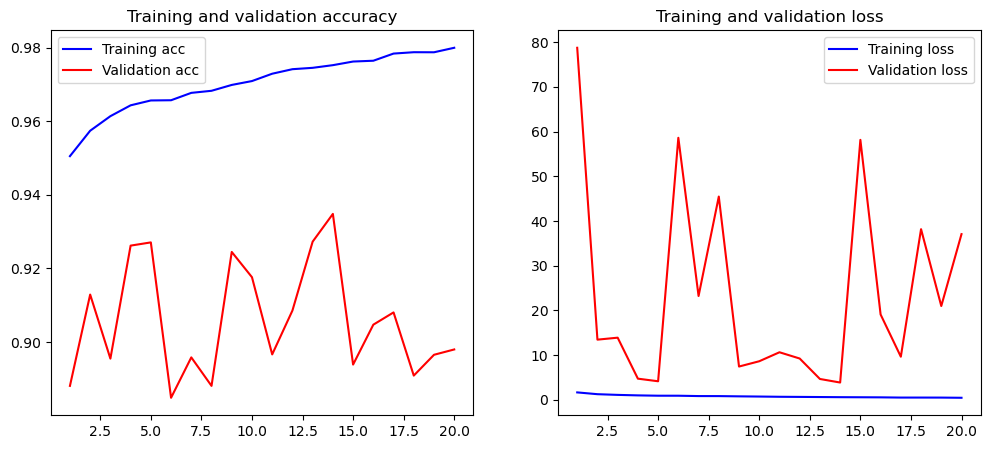

In [51]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
    
    
    
plot_history(gistory)

In [52]:
predictions = np.argmax(cnn_model.predict(X_test), axis=-1)

69/69 [==============================] - 1s 8ms/step


In [53]:
predictions

array([14,  1, 16, ..., 11,  9, 12], dtype=int64)

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
print(classification_report(y_test.values , predictions))

              precision    recall  f1-score   support

           0       0.54      0.54      0.54        68
           1       0.83      0.74      0.78       176
           2       0.57      0.81      0.67        97
           3       0.79      0.63      0.70        90
           4       0.76      0.48      0.59        93
           5       0.65      0.69      0.67       108
           6       0.83      0.84      0.84       126
           7       0.82      0.62      0.70       136
           8       0.62      0.66      0.64       122
           9       0.78      0.65      0.70       155
          10       0.64      0.80      0.71        61
          11       0.68      0.42      0.52       172
          12       0.71      0.73      0.72       182
          13       0.50      0.72      0.59       151
          14       0.57      0.69      0.62       200
          15       0.86      0.83      0.84       169
          16       0.83      0.97      0.90        77

    accuracy              

In [35]:
# okay it is expected tbh lets try it 4 more times

In [67]:
gistoty = cnn_model.fit(X_train, 
              y_train1 , 
              batch_size = 32 , 
              epochs = 5 , 
              validation_split = (0.2) ,
              class_weight=class_weights ,
              verbose =1)

Epoch 1/5
219/219 [==============================] - 6s 25ms/step - loss: 0.2820 - accuracy: 0.9875 - recall: 0.8744 - val_loss: 12.3144 - val_accuracy: 0.9139 - val_recall: 0.2387
Epoch 2/5
219/219 [==============================] - 5s 25ms/step - loss: 0.3484 - accuracy: 0.9851 - recall: 0.8523 - val_loss: 5.2629 - val_accuracy: 0.9249 - val_recall: 0.3446
Epoch 3/5
219/219 [==============================] - 5s 25ms/step - loss: 0.3479 - accuracy: 0.9849 - recall: 0.8504 - val_loss: 10.5083 - val_accuracy: 0.9193 - val_recall: 0.3045
Epoch 4/5
219/219 [==============================] - 6s 26ms/step - loss: 0.3178 - accuracy: 0.9859 - recall: 0.8626 - val_loss: 4.8695 - val_accuracy: 0.9365 - val_recall: 0.4287
Epoch 5/5
219/219 [==============================] - 6s 25ms/step - loss: 0.2946 - accuracy: 0.9874 - recall: 0.8746 - val_loss: 5.9198 - val_accuracy: 0.9300 - val_recall: 0.3892


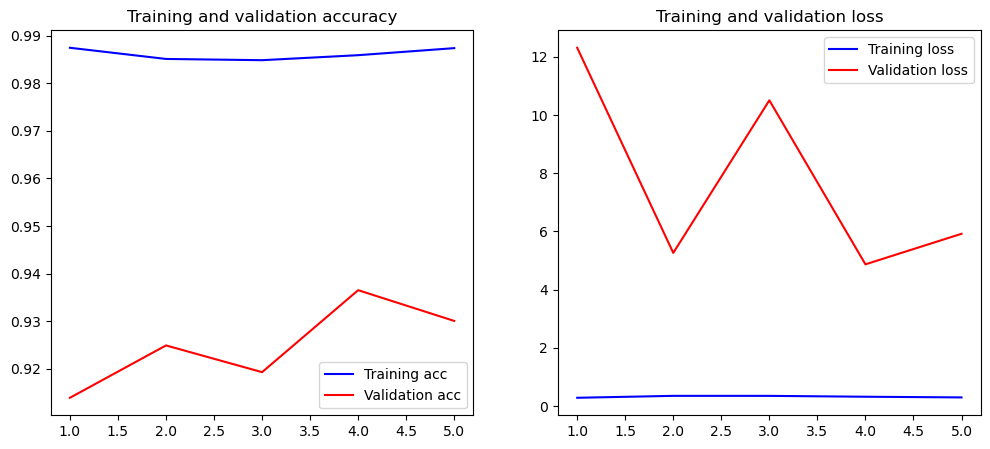

In [68]:
plot_history(gistoty)

In [69]:
predictions = np.argmax(cnn_model.predict(X_test), axis=-1)

69/69 [==============================] - 1s 8ms/step


In [70]:
predictions

array([14,  1, 16, ...,  8,  9, 12], dtype=int64)

In [71]:
print(classification_report(y_test.values , predictions))

              precision    recall  f1-score   support

           0       0.53      0.59      0.56        68
           1       0.79      0.75      0.77       176
           2       0.77      0.71      0.74        97
           3       0.67      0.63      0.65        90
           4       0.71      0.57      0.63        93
           5       0.63      0.76      0.69       108
           6       0.85      0.82      0.83       126
           7       0.73      0.79      0.76       136
           8       0.66      0.69      0.67       122
           9       0.78      0.70      0.74       155
          10       0.60      0.89      0.72        61
          11       0.58      0.66      0.61       172
          12       0.72      0.76      0.74       182
          13       0.68      0.62      0.65       151
          14       0.73      0.51      0.60       200
          15       0.83      0.84      0.84       169
          16       0.77      0.97      0.86        77

    accuracy              

In [61]:
# much better , but lets try it 5 more times

In [45]:
cnn_model.fit(X_train, 
              y_train1 , 
              batch_size = 32 , 
              epochs = 5 , 
              validation_split = (0.2) ,
              class_weight=class_weights ,
              verbose =1)

Epoch 1/5
219/219 [==============================] - 6s 29ms/step - loss: 0.6777 - accuracy: 0.9731 - precision: 0.8189 - recall: 0.6961 - val_loss: 19.7196 - val_accuracy: 0.8977 - val_precision: 0.1302 - val_recall: 0.1299
Epoch 2/5
219/219 [==============================] - 7s 30ms/step - loss: 0.6713 - accuracy: 0.9731 - precision: 0.8220 - recall: 0.6931 - val_loss: 4.7552 - val_accuracy: 0.9309 - val_precision: 0.4059 - val_recall: 0.3766
Epoch 3/5
219/219 [==============================] - 6s 28ms/step - loss: 0.6276 - accuracy: 0.9742 - precision: 0.8230 - recall: 0.7150 - val_loss: 3.1367 - val_accuracy: 0.9338 - val_precision: 0.4230 - val_recall: 0.3446
Epoch 4/5
219/219 [==============================] - 7s 31ms/step - loss: 0.6041 - accuracy: 0.9752 - precision: 0.8306 - recall: 0.7258 - val_loss: 7.6956 - val_accuracy: 0.9146 - val_precision: 0.2639 - val_recall: 0.2524
Epoch 5/5
219/219 [==============================] - 7s 34ms/step - loss: 0.5816 - accuracy: 0.9757 - p

In [42]:
predictions = np.argmax(cnn_model.predict(X_test), axis=-1)

predictions

69/69 [==============================] - 1s 8ms/step


array([ 3,  1, 16, ..., 13,  9, 12], dtype=int64)

In [43]:
print(classification_report(y_test.values , predictions))

              precision    recall  f1-score   support

           0       0.59      0.44      0.50        68
           1       0.91      0.28      0.43       176
           2       0.72      0.32      0.44        97
           3       0.29      0.74      0.42        90
           4       0.64      0.49      0.56        93
           5       0.23      0.89      0.37       108
           6       0.90      0.51      0.65       126
           7       0.70      0.49      0.57       136
           8       0.76      0.43      0.55       122
           9       0.61      0.68      0.65       155
          10       0.76      0.26      0.39        61
          11       0.72      0.13      0.23       172
          12       0.83      0.29      0.43       182
          13       0.26      0.76      0.38       151
          14       0.63      0.32      0.42       200
          15       0.87      0.77      0.82       169
          16       0.81      0.99      0.89        77

    accuracy              

In [44]:
# lets tdo it 5 more times , but without the classes

## CNN MODEL 1.2

In [36]:
cnn_model1_2 = tf.keras.Sequential()
cnn_model1_2.add(tf.keras.layers.Conv1D(256,2,input_shape=(in_dim,1), activation='leaky_relu')) # for the first comment 256 == 128
cnn_model1_2.add(tf.keras.layers.MaxPool1D())
cnn_model1_2.add(tf.keras.layers.Conv1D(128,2,activation='leaky_relu')) #for the first comment 128 == 64
cnn_model1_2.add(tf.keras.layers.MaxPool1D())
cnn_model1_2.add(tf.keras.layers.Conv1D(128,2,activation='leaky_relu')) 
cnn_model1_2.add(tf.keras.layers.MaxPool1D())
cnn_model1_2.add(tf.keras.layers.Conv1D(64,2,activation='leaky_relu'))
cnn_model1_2.add(tf.keras.layers.MaxPool1D())
cnn_model1_2.add(tf.keras.layers.BatchNormalization())
cnn_model1_2.add(tf.keras.layers.Flatten())
cnn_model1_2.add(tf.keras.layers.Dense(64,activation='leaky_relu'))
cnn_model1_2.add(tf.keras.layers.Dense(32,activation='leaky_relu'))
cnn_model1_2.add(tf.keras.layers.Dense(17,activation='sigmoid'))

In [37]:
opt = tf.keras.optimizers.AdamW(learning_rate =0.007 , beta_1=0.9,
    beta_2=0.999,
    use_ema=True,
    ema_momentum=0.99)

In [38]:
cnn_model1_2.compile(optimizer=opt, 
          loss = 'binary_crossentropy',
          metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                   tf.keras.metrics.Precision(name='precision') ,
                   tf.keras.metrics.Recall(name='recall')])

In [39]:
cnn_model1_2.fit(X_train, 
              y_train1 , 
              batch_size = 32 , 
              epochs = 5 , 
              validation_split = (0.2) ,
              #class_weight=class_weights ,
              verbose =1)

Epoch 1/5
219/219 [==============================] - 8s 27ms/step - loss: 0.1558 - accuracy: 0.9457 - precision: 0.5748 - recall: 0.2981 - val_loss: 1.8264 - val_accuracy: 0.8305 - val_precision: 0.0410 - val_recall: 0.0841
Epoch 2/5
219/219 [==============================] - 6s 27ms/step - loss: 0.1146 - accuracy: 0.9581 - precision: 0.7222 - recall: 0.4664 - val_loss: 0.7018 - val_accuracy: 0.8953 - val_precision: 0.0994 - val_recall: 0.0967
Epoch 3/5
219/219 [==============================] - 6s 27ms/step - loss: 0.1031 - accuracy: 0.9622 - precision: 0.7553 - recall: 0.5293 - val_loss: 1.3549 - val_accuracy: 0.9446 - val_precision: 0.7179 - val_recall: 0.0962
Epoch 4/5
219/219 [==============================] - 6s 25ms/step - loss: 0.0959 - accuracy: 0.9649 - precision: 0.7719 - recall: 0.5722 - val_loss: 2.1257 - val_accuracy: 0.8375 - val_precision: 0.0967 - val_recall: 0.2112
Epoch 5/5
219/219 [==============================] - 5s 24ms/step - loss: 0.0916 - accuracy: 0.9659 - pr

In [40]:
predictions = np.argmax(cnn_model1_2.predict(X_test), axis=-1)

69/69 [==============================] - 1s 8ms/step


In [41]:
predictions

array([13,  1, 16, ..., 13,  9, 12], dtype=int64)

In [42]:
print(classification_report(y_test.values , predictions))

              precision    recall  f1-score   support

           0       0.42      0.44      0.43        68
           1       0.74      0.71      0.72       176
           2       0.67      0.70      0.68        97
           3       0.62      0.68      0.65        90
           4       0.80      0.53      0.64        93
           5       0.84      0.43      0.56       108
           6       0.86      0.60      0.70       126
           7       0.85      0.25      0.39       136
           8       0.72      0.50      0.59       122
           9       0.91      0.44      0.59       155
          10       0.63      0.67      0.65        61
          11       0.69      0.26      0.37       172
          12       0.71      0.72      0.71       182
          13       0.19      0.91      0.32       151
          14       0.68      0.21      0.32       200
          15       0.86      0.74      0.80       169
          16       0.73      0.96      0.83        77

    accuracy              

In [43]:
cnn_model1_2.fit(X_train, 
              y_train1 , 
              batch_size = 32 , 
              epochs = 5 , 
              validation_split = (0.2) ,
              #class_weight=class_weights ,
              verbose =1)

Epoch 1/5
219/219 [==============================] - 6s 27ms/step - loss: 0.0875 - accuracy: 0.9679 - precision: 0.7935 - recall: 0.6140 - val_loss: 0.3309 - val_accuracy: 0.9235 - val_precision: 0.2995 - val_recall: 0.2244
Epoch 2/5
219/219 [==============================] - 6s 27ms/step - loss: 0.0851 - accuracy: 0.9680 - precision: 0.7890 - recall: 0.6236 - val_loss: 5.4873 - val_accuracy: 0.8994 - val_precision: 0.0805 - val_recall: 0.0681
Epoch 3/5
219/219 [==============================] - 6s 27ms/step - loss: 0.0815 - accuracy: 0.9692 - precision: 0.7968 - recall: 0.6384 - val_loss: 0.6834 - val_accuracy: 0.9051 - val_precision: 0.1650 - val_recall: 0.1511
Epoch 4/5
219/219 [==============================] - 6s 27ms/step - loss: 0.0764 - accuracy: 0.9713 - precision: 0.8140 - recall: 0.6647 - val_loss: 2.0067 - val_accuracy: 0.9221 - val_precision: 0.1099 - val_recall: 0.0458
Epoch 5/5
219/219 [==============================] - 5s 24ms/step - loss: 0.0740 - accuracy: 0.9721 - pr

In [46]:
predictions = np.argmax(cnn_model1_2.predict(X_test)>0.5, axis=-1)
predictions

69/69 [==============================] - 1s 9ms/step


array([14,  1, 16, ..., 11,  9, 12], dtype=int64)

In [47]:
print(classification_report(y_test.values , predictions))

              precision    recall  f1-score   support

           0       0.12      0.81      0.21        68
           1       0.88      0.67      0.76       176
           2       0.78      0.69      0.73        97
           3       0.84      0.54      0.66        90
           4       0.83      0.47      0.60        93
           5       0.76      0.67      0.71       108
           6       0.85      0.79      0.82       126
           7       0.84      0.74      0.78       136
           8       0.78      0.52      0.62       122
           9       0.87      0.61      0.72       155
          10       0.71      0.52      0.60        61
          11       0.64      0.62      0.63       172
          12       0.86      0.62      0.72       182
          13       0.77      0.54      0.64       151
          14       0.67      0.52      0.58       200
          15       0.86      0.87      0.87       169
          16       0.82      0.97      0.89        77

    accuracy              

In [48]:
cnn_model1_2.fit(X_train, 
              y_train1 , 
              batch_size = 32 , 
              epochs = 5 , 
              validation_split = (0.2) ,
              #class_weight=class_weights ,
              verbose =1)

Epoch 1/5
219/219 [==============================] - 6s 28ms/step - loss: 0.0700 - accuracy: 0.9734 - precision: 0.8228 - recall: 0.6981 - val_loss: 0.9152 - val_accuracy: 0.8970 - val_precision: 0.1360 - val_recall: 0.1402
Epoch 2/5
219/219 [==============================] - 6s 27ms/step - loss: 0.0706 - accuracy: 0.9735 - precision: 0.8224 - recall: 0.7001 - val_loss: 0.9822 - val_accuracy: 0.8644 - val_precision: 0.0920 - val_recall: 0.1471
Epoch 3/5
219/219 [==============================] - 5s 24ms/step - loss: 0.0662 - accuracy: 0.9748 - precision: 0.8326 - recall: 0.7151 - val_loss: 1.1988 - val_accuracy: 0.8955 - val_precision: 0.1844 - val_recall: 0.2267
Epoch 4/5
219/219 [==============================] - 5s 24ms/step - loss: 0.0640 - accuracy: 0.9759 - precision: 0.8381 - recall: 0.7324 - val_loss: 0.5047 - val_accuracy: 0.9076 - val_precision: 0.2597 - val_recall: 0.3080
Epoch 5/5
219/219 [==============================] - 5s 24ms/step - loss: 0.0602 - accuracy: 0.9779 - pr

In [58]:
predictions = np.argmax(cnn_model1_2.predict(X_test)>0.99, axis=-1)
predictions

69/69 [==============================] - 1s 8ms/step


array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [59]:
print(classification_report(y_test.values , predictions))

              precision    recall  f1-score   support

           0       0.04      0.99      0.07        68
           1       0.98      0.24      0.38       176
           2       0.96      0.26      0.41        97
           3       1.00      0.36      0.52        90
           4       0.89      0.34      0.50        93
           5       1.00      0.09      0.17       108
           6       0.97      0.26      0.41       126
           7       1.00      0.07      0.14       136
           8       0.94      0.24      0.38       122
           9       0.88      0.28      0.42       155
          10       1.00      0.20      0.33        61
          11       1.00      0.02      0.05       172
          12       0.85      0.09      0.17       182
          13       0.87      0.18      0.30       151
          14       0.75      0.01      0.03       200
          15       0.99      0.49      0.66       169
          16       1.00      0.48      0.65        77

    accuracy              

## CNN MODEL 2

In [59]:
cnn_model2 = tf.keras.Sequential()
cnn_model2.add(tf.keras.layers.Conv1D(256,2,input_shape=(in_dim,1), activation='leaky_relu')) # for the first comment 256 == 128
cnn_model2.add(tf.keras.layers.MaxPool1D())
cnn_model2.add(tf.keras.layers.Conv1D(128,2,activation='leaky_relu')) #for the first comment 128 == 64
cnn_model2.add(tf.keras.layers.MaxPool1D())
cnn_model2.add(tf.keras.layers.Conv1D(128,2,activation='leaky_relu')) 
cnn_model2.add(tf.keras.layers.MaxPool1D())
cnn_model2.add(tf.keras.layers.Conv1D(64,2,activation='leaky_relu'))
cnn_model2.add(tf.keras.layers.MaxPool1D())
cnn_model2.add(tf.keras.layers.BatchNormalization())
cnn_model2.add(tf.keras.layers.Flatten())
cnn_model2.add(tf.keras.layers.Dense(64,activation='leaky_relu'))
cnn_model2.add(tf.keras.layers.Dense(32,activation='leaky_relu'))
cnn_model2.add(tf.keras.layers.Dense(17,activation='softmax'))

In [60]:
opt = tf.keras.optimizers.AdamW(learning_rate =0.0005 , beta_1=0.9,
    beta_2=0.999,
    use_ema=True,
    ema_momentum=0.99)

In [61]:
cnn_model2.compile(optimizer=opt, 
          loss = 'categorical_crossentropy',
          metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                   tf.keras.metrics.Precision(name='precision') ,
                   tf.keras.metrics.Recall(name='recall')])

In [62]:
cnn_model2.fit(X_train, 
              y_train1 , 
              batch_size = 32 , 
              epochs = 5 , 
              validation_split = (0.2) ,
              #class_weight=class_weights ,
              verbose =1)

Epoch 1/5
219/219 [==============================] - 8s 26ms/step - loss: 1.6249 - accuracy: 0.9527 - precision: 0.7511 - recall: 0.2942 - val_loss: 2.4061 - val_accuracy: 0.9412 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/5
219/219 [==============================] - 5s 24ms/step - loss: 1.1107 - accuracy: 0.9625 - precision: 0.7689 - recall: 0.5183 - val_loss: 1.6595 - val_accuracy: 0.9463 - val_precision: 0.8953 - val_recall: 0.0979
Epoch 3/5
219/219 [==============================] - 5s 24ms/step - loss: 0.9964 - accuracy: 0.9652 - precision: 0.7781 - recall: 0.5702 - val_loss: 1.2657 - val_accuracy: 0.9608 - val_precision: 0.7971 - val_recall: 0.4476
Epoch 4/5
219/219 [==============================] - 5s 24ms/step - loss: 0.9129 - accuracy: 0.9680 - precision: 0.7989 - recall: 0.6103 - val_loss: 1.4983 - val_accuracy: 0.9519 - val_precision: 0.6211 - val_recall: 0.4654
Epoch 5/5
219/219 [==============================] - 5s 25ms/step - loss: 0.8572 - accuracy: 0.9

In [63]:
predictions = np.argmax(cnn_model2.predict(X_test), axis=-1)

predictions

69/69 [==============================] - 1s 8ms/step


array([14,  1, 16, ..., 11,  9, 12], dtype=int64)

In [64]:
print(classification_report(y_test.values , predictions))

              precision    recall  f1-score   support

           0       0.55      0.44      0.49        68
           1       0.78      0.74      0.76       176
           2       0.68      0.79      0.73        97
           3       0.67      0.62      0.64        90
           4       0.75      0.54      0.62        93
           5       0.63      0.77      0.69       108
           6       0.83      0.80      0.81       126
           7       0.73      0.78      0.75       136
           8       0.68      0.67      0.67       122
           9       0.76      0.68      0.72       155
          10       0.61      0.64      0.62        61
          11       0.65      0.64      0.64       172
          12       0.73      0.78      0.76       182
          13       0.64      0.59      0.62       151
          14       0.59      0.58      0.59       200
          15       0.83      0.89      0.86       169
          16       0.80      0.97      0.88        77

    accuracy              

In [66]:
# Wow 70% accuracy!!? No way , mitropanos helps a lot (I am kapsouris rn)
# anyway lets run it 5 more times

In [67]:
cnn_model2.fit(X_train, 
              y_train1 , 
              batch_size = 32 , 
              epochs = 5 , 
              validation_split = (0.2) ,
              #class_weight=class_weights ,
              verbose =1)

Epoch 1/5
219/219 [==============================] - 6s 27ms/step - loss: 0.8149 - accuracy: 0.9712 - precision: 0.8177 - recall: 0.6563 - val_loss: 1.2359 - val_accuracy: 0.9592 - val_precision: 0.6895 - val_recall: 0.5581
Epoch 2/5
219/219 [==============================] - 6s 27ms/step - loss: 0.7704 - accuracy: 0.9727 - precision: 0.8314 - recall: 0.6713 - val_loss: 1.4970 - val_accuracy: 0.9558 - val_precision: 0.6637 - val_recall: 0.5037
Epoch 3/5
219/219 [==============================] - 6s 25ms/step - loss: 0.7259 - accuracy: 0.9738 - precision: 0.8337 - recall: 0.6918 - val_loss: 1.1919 - val_accuracy: 0.9623 - val_precision: 0.7192 - val_recall: 0.5879
Epoch 4/5
219/219 [==============================] - 5s 25ms/step - loss: 0.6778 - accuracy: 0.9751 - precision: 0.8419 - recall: 0.7111 - val_loss: 1.5013 - val_accuracy: 0.9542 - val_precision: 0.6294 - val_recall: 0.5375
Epoch 5/5
219/219 [==============================] - 7s 30ms/step - loss: 0.6264 - accuracy: 0.9768 - pr

In [68]:
predictions = np.argmax(cnn_model2.predict(X_test), axis=-1)

predictions

69/69 [==============================] - 1s 9ms/step


array([14,  1, 16, ...,  8,  9, 12], dtype=int64)

In [69]:
print(classification_report(y_test.values , predictions))

              precision    recall  f1-score   support

           0       0.56      0.50      0.53        68
           1       0.81      0.77      0.79       176
           2       0.71      0.76      0.74        97
           3       0.71      0.62      0.66        90
           4       0.71      0.56      0.63        93
           5       0.66      0.72      0.69       108
           6       0.80      0.84      0.82       126
           7       0.74      0.74      0.74       136
           8       0.66      0.71      0.69       122
           9       0.80      0.69      0.74       155
          10       0.67      0.70      0.69        61
          11       0.63      0.66      0.65       172
          12       0.72      0.77      0.75       182
          13       0.65      0.60      0.63       151
          14       0.60      0.62      0.61       200
          15       0.85      0.83      0.84       169
          16       0.83      0.97      0.90        77

    accuracy              

In [70]:
# 71 percent ?? , I guess we can do better

# MODEL 3

In [71]:
cnn_model3 = tf.keras.Sequential()
cnn_model3.add(tf.keras.layers.Conv1D(256,2,input_shape=(in_dim,1), activation='leaky_relu')) # for the first comment 256 == 128
cnn_model3.add(tf.keras.layers.MaxPool1D())
cnn_model3.add(tf.keras.layers.Conv1D(128,2,activation='leaky_relu')) #for the first comment 128 == 64
cnn_model3.add(tf.keras.layers.MaxPool1D())
cnn_model3.add(tf.keras.layers.Conv1D(128,2,activation='leaky_relu')) 
cnn_model3.add(tf.keras.layers.MaxPool1D())
cnn_model3.add(tf.keras.layers.Conv1D(64,2,activation='leaky_relu'))
cnn_model3.add(tf.keras.layers.MaxPool1D())
cnn_model3.add(tf.keras.layers.BatchNormalization())
cnn_model3.add(tf.keras.layers.Flatten())
cnn_model3.add(tf.keras.layers.Dense(64,activation='leaky_relu'))
cnn_model3.add(tf.keras.layers.Dense(32,activation='leaky_relu'))
cnn_model3.add(tf.keras.layers.Dense(17,activation='softmax'))

In [72]:
opt = tf.keras.optimizers.AdamW(learning_rate =0.00005 , beta_1=0.9,
    beta_2=0.999,
    use_ema=True,
    ema_momentum=0.99)

In [73]:
cnn_model3.compile(optimizer=opt, 
          loss = 'categorical_crossentropy',
          metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                   tf.keras.metrics.Precision(name='precision') ,
                   tf.keras.metrics.Recall(name='recall')])

In [74]:
cnn_model3.fit(X_train, 
              y_train1 , 
              batch_size = 32 , 
              epochs = 5 , 
              validation_split = (0.2) ,
              #class_weight=class_weights ,
              verbose =1)

Epoch 1/5
219/219 [==============================] - 8s 27ms/step - loss: 2.6518 - accuracy: 0.9412 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 2.7787 - val_accuracy: 0.9412 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/5
219/219 [==============================] - 5s 24ms/step - loss: 1.9288 - accuracy: 0.9445 - precision: 0.8839 - recall: 0.0654 - val_loss: 2.3016 - val_accuracy: 0.9412 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/5
219/219 [==============================] - 6s 26ms/step - loss: 1.4666 - accuracy: 0.9541 - precision: 0.8295 - recall: 0.2766 - val_loss: 1.5435 - val_accuracy: 0.9510 - val_precision: 0.9101 - val_recall: 0.1855
Epoch 4/5
219/219 [==============================] - 6s 27ms/step - loss: 1.3071 - accuracy: 0.9581 - precision: 0.8090 - recall: 0.3772 - val_loss: 1.3103 - val_accuracy: 0.9586 - val_precision: 0.8131 - val_recall: 0.3835
Epoch 5/5
219/219 [==============================] - 5s 24ms/step - loss: 1.2165

In [79]:
predictions = np.argmax(cnn_model3.predict(X_test), axis=-1)

predictions

69/69 [==============================] - 1s 7ms/step


array([14,  1, 16, ..., 11,  9, 12], dtype=int64)

In [80]:
print(classification_report(y_test.values , predictions))

              precision    recall  f1-score   support

           0       0.73      0.24      0.36        68
           1       0.74      0.68      0.71       176
           2       0.68      0.67      0.67        97
           3       0.69      0.60      0.64        90
           4       0.75      0.48      0.59        93
           5       0.64      0.78      0.70       108
           6       0.79      0.79      0.79       126
           7       0.68      0.70      0.69       136
           8       0.53      0.63      0.58       122
           9       0.79      0.57      0.66       155
          10       0.51      0.54      0.52        61
          11       0.50      0.66      0.57       172
          12       0.72      0.75      0.73       182
          13       0.67      0.56      0.61       151
          14       0.46      0.56      0.51       200
          15       0.81      0.84      0.82       169
          16       0.85      0.91      0.88        77

    accuracy              

In [81]:
# nice , lets do it again another 5 times

In [82]:
cnn_model3.fit(X_train, 
              y_train1 , 
              batch_size = 32 , 
              epochs = 5 , 
              validation_split = (0.2) ,
              #class_weight=class_weights ,
              verbose =1)

Epoch 1/5
219/219 [==============================] - 5s 24ms/step - loss: 1.0883 - accuracy: 0.9634 - precision: 0.8057 - recall: 0.4981 - val_loss: 1.1704 - val_accuracy: 0.9621 - val_precision: 0.7813 - val_recall: 0.4928
Epoch 2/5
219/219 [==============================] - 5s 24ms/step - loss: 1.0525 - accuracy: 0.9643 - precision: 0.8068 - recall: 0.5164 - val_loss: 1.1583 - val_accuracy: 0.9621 - val_precision: 0.7733 - val_recall: 0.5037
Epoch 3/5
219/219 [==============================] - 6s 27ms/step - loss: 1.0202 - accuracy: 0.9652 - precision: 0.8091 - recall: 0.5339 - val_loss: 1.1500 - val_accuracy: 0.9620 - val_precision: 0.7678 - val_recall: 0.5072
Epoch 4/5
219/219 [==============================] - 6s 26ms/step - loss: 0.9905 - accuracy: 0.9662 - precision: 0.8135 - recall: 0.5522 - val_loss: 1.1255 - val_accuracy: 0.9637 - val_precision: 0.7874 - val_recall: 0.5238
Epoch 5/5
219/219 [==============================] - 6s 26ms/step - loss: 0.9678 - accuracy: 0.9667 - pr

In [83]:
predictions = np.argmax(cnn_model3.predict(X_test), axis=-1)

predictions

69/69 [==============================] - 1s 8ms/step


array([14,  1, 16, ..., 11,  9, 12], dtype=int64)

In [84]:
print(classification_report(y_test.values , predictions))

              precision    recall  f1-score   support

           0       0.61      0.41      0.49        68
           1       0.77      0.70      0.73       176
           2       0.66      0.71      0.69        97
           3       0.70      0.63      0.67        90
           4       0.72      0.54      0.62        93
           5       0.67      0.72      0.69       108
           6       0.78      0.79      0.79       126
           7       0.67      0.74      0.70       136
           8       0.60      0.59      0.59       122
           9       0.80      0.67      0.73       155
          10       0.54      0.52      0.53        61
          11       0.53      0.61      0.57       172
          12       0.73      0.75      0.74       182
          13       0.63      0.63      0.63       151
          14       0.54      0.57      0.56       200
          15       0.79      0.86      0.82       169
          16       0.83      0.96      0.89        77

    accuracy              

In [85]:
# ok really slow progression , lets try another model (not cnn , and then try again with a smaller batch size)

# MODEL 4

In [92]:
model4 = Sequential()
model4.add(Dense(100,input_dim=in_dim,activation = "leaky_relu"))
model4.add(Dense(180,activation = "leaky_relu"))
model4.add(Dropout(0.2))
model4.add(Dense(60,activation = "leaky_relu"))
model4.add(Dense(17,activation = "softmax"))

In [88]:
opt = tf.keras.optimizers.AdamW(learning_rate =0.00005 , beta_1=0.9,
    beta_2=0.999,
    use_ema=True,
    ema_momentum=0.99)

In [93]:
model4.compile(optimizer=opt, 
          loss = 'categorical_crossentropy',
          metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                   tf.keras.metrics.Precision(name='precision') ,
                   tf.keras.metrics.Recall(name='recall')])

In [94]:
model4.fit(X_train,y_train1 ,batch_size = 32 ,epochs = 5 ,validation_split = (0.2) ,verbose =1)

Epoch 1/5
219/219 [==============================] - 3s 5ms/step - loss: 2.7835 - accuracy: 0.9412 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 2.7348 - val_accuracy: 0.9412 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/5
219/219 [==============================] - 1s 3ms/step - loss: 2.6825 - accuracy: 0.9412 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 2.6122 - val_accuracy: 0.9412 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/5
219/219 [==============================] - 1s 3ms/step - loss: 2.5413 - accuracy: 0.9412 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 2.4405 - val_accuracy: 0.9412 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/5
219/219 [==============================] - 1s 3ms/step - loss: 2.3594 - accuracy: 0.9413 - precision: 1.0000 - recall: 0.0017 - val_loss: 2.2420 - val_accuracy: 0.9417 - val_precision: 1.0000 - val_recall: 0.0086
Epoch 5/5
219/219 [==============================] - 1s 3ms/

In [95]:
predictions = np.argmax(model4.predict(X_test), axis=-1)

predictions

69/69 [==============================] - 0s 2ms/step


array([14,  1, 16, ..., 11, 14, 12], dtype=int64)

In [96]:
print(classification_report(y_test.values , predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        68
           1       0.46      0.82      0.59       176
           2       1.00      0.01      0.02        97
           3       0.84      0.23      0.37        90
           4       0.00      0.00      0.00        93
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00       126
           7       0.41      0.35      0.37       136
           8       0.32      0.12      0.18       122
           9       0.79      0.30      0.43       155
          10       0.00      0.00      0.00        61
          11       0.31      0.44      0.36       172
          12       0.51      0.67      0.58       182
          13       0.50      0.15      0.23       151
          14       0.17      0.61      0.27       200
          15       0.55      0.91      0.68       169
          16       0.70      0.88      0.78        77

    accuracy              

C:\Users\Desktop\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Desktop\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Desktop\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [97]:
# I think it need some more training

In [98]:
model4.fit(X_train,y_train1 ,batch_size = 32 ,epochs = 5 ,validation_split = (0.2) ,verbose =1)

Epoch 1/5
219/219 [==============================] - 1s 4ms/step - loss: 2.0918 - accuracy: 0.9435 - precision: 0.9132 - recall: 0.0437 - val_loss: 1.9875 - val_accuracy: 0.9452 - val_precision: 0.8993 - val_recall: 0.0767
Epoch 2/5
219/219 [==============================] - 1s 3ms/step - loss: 1.9561 - accuracy: 0.9453 - precision: 0.8829 - recall: 0.0799 - val_loss: 1.8589 - val_accuracy: 0.9465 - val_precision: 0.8955 - val_recall: 0.1030
Epoch 3/5
219/219 [==============================] - 1s 3ms/step - loss: 1.8382 - accuracy: 0.9466 - precision: 0.8893 - recall: 0.1047 - val_loss: 1.7515 - val_accuracy: 0.9475 - val_precision: 0.8795 - val_recall: 0.1254
Epoch 4/5
219/219 [==============================] - 1s 3ms/step - loss: 1.7406 - accuracy: 0.9477 - precision: 0.8757 - recall: 0.1291 - val_loss: 1.6635 - val_accuracy: 0.9491 - val_precision: 0.8679 - val_recall: 0.1580
Epoch 5/5
219/219 [==============================] - 1s 3ms/step - loss: 1.6664 - accuracy: 0.9483 - precisi

In [99]:
predictions = np.argmax(model4.predict(X_test), axis=-1)

predictions

69/69 [==============================] - 0s 2ms/step


array([14,  1, 16, ..., 11,  9, 12], dtype=int64)

In [100]:
print(classification_report(y_test.values , predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        68
           1       0.64      0.66      0.65       176
           2       0.75      0.42      0.54        97
           3       0.67      0.62      0.64        90
           4       0.64      0.08      0.13        93
           5       0.79      0.41      0.54       108
           6       0.82      0.25      0.38       126
           7       0.44      0.57      0.49       136
           8       0.37      0.43      0.40       122
           9       0.58      0.51      0.54       155
          10       0.00      0.00      0.00        61
          11       0.41      0.52      0.46       172
          12       0.58      0.80      0.67       182
          13       0.39      0.55      0.45       151
          14       0.27      0.42      0.33       200
          15       0.71      0.90      0.80       169
          16       0.71      0.87      0.78        77

    accuracy              

C:\Users\Desktop\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Desktop\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Desktop\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [101]:
# still needs training (sto background paizei to vrexei sthn ftwxogeitonia , ara vrexei kai sthn kardia mou)

In [102]:
model4.fit(X_train,y_train1 ,batch_size = 32 ,epochs = 5 ,validation_split = (0.2) ,verbose =1)

Epoch 1/5
219/219 [==============================] - 1s 3ms/step - loss: 1.6314 - accuracy: 0.9490 - precision: 0.8407 - recall: 0.1632 - val_loss: 1.5661 - val_accuracy: 0.9501 - val_precision: 0.8438 - val_recall: 0.1855
Epoch 2/5
219/219 [==============================] - 1s 3ms/step - loss: 1.5752 - accuracy: 0.9496 - precision: 0.8293 - recall: 0.1808 - val_loss: 1.5141 - val_accuracy: 0.9508 - val_precision: 0.8329 - val_recall: 0.2055
Epoch 3/5
219/219 [==============================] - 1s 3ms/step - loss: 1.5305 - accuracy: 0.9504 - precision: 0.8162 - recall: 0.2029 - val_loss: 1.4699 - val_accuracy: 0.9519 - val_precision: 0.8330 - val_recall: 0.2284
Epoch 4/5
219/219 [==============================] - 1s 3ms/step - loss: 1.4929 - accuracy: 0.9509 - precision: 0.8070 - recall: 0.2168 - val_loss: 1.4380 - val_accuracy: 0.9525 - val_precision: 0.8247 - val_recall: 0.2450
Epoch 5/5
219/219 [==============================] - 1s 3ms/step - loss: 1.4561 - accuracy: 0.9517 - precisi

In [103]:
predictions = np.argmax(model4.predict(X_test), axis=-1)

predictions

69/69 [==============================] - 0s 1ms/step


array([14,  1, 16, ..., 11,  9, 12], dtype=int64)

In [104]:
print(classification_report(y_test.values , predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        68
           1       0.70      0.64      0.66       176
           2       0.66      0.59      0.62        97
           3       0.66      0.66      0.66        90
           4       0.77      0.32      0.45        93
           5       0.66      0.63      0.64       108
           6       0.75      0.68      0.72       126
           7       0.57      0.63      0.60       136
           8       0.39      0.46      0.42       122
           9       0.68      0.55      0.61       155
          10       0.67      0.26      0.38        61
          11       0.45      0.59      0.51       172
          12       0.66      0.75      0.70       182
          13       0.53      0.63      0.57       151
          14       0.36      0.42      0.39       200
          15       0.74      0.89      0.80       169
          16       0.74      0.91      0.82        77

    accuracy              

C:\Users\Desktop\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Desktop\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Desktop\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [105]:
# wow it is still bad

In [106]:
model4.fit(X_train,y_train1 ,batch_size = 32 ,epochs = 5 ,validation_split = (0.2) ,verbose =1)

Epoch 1/5
219/219 [==============================] - 1s 3ms/step - loss: 1.4380 - accuracy: 0.9524 - precision: 0.8118 - recall: 0.2482 - val_loss: 1.3917 - val_accuracy: 0.9540 - val_precision: 0.8212 - val_recall: 0.2788
Epoch 2/5
219/219 [==============================] - 1s 3ms/step - loss: 1.4066 - accuracy: 0.9532 - precision: 0.8020 - recall: 0.2707 - val_loss: 1.3651 - val_accuracy: 0.9556 - val_precision: 0.8230 - val_recall: 0.3114
Epoch 3/5
219/219 [==============================] - 1s 3ms/step - loss: 1.3915 - accuracy: 0.9536 - precision: 0.7931 - recall: 0.2859 - val_loss: 1.3429 - val_accuracy: 0.9561 - val_precision: 0.8224 - val_recall: 0.3234
Epoch 4/5
219/219 [==============================] - 1s 3ms/step - loss: 1.3619 - accuracy: 0.9540 - precision: 0.7889 - recall: 0.2975 - val_loss: 1.3211 - val_accuracy: 0.9568 - val_precision: 0.8167 - val_recall: 0.3417
Epoch 5/5
219/219 [==============================] - 1s 3ms/step - loss: 1.3391 - accuracy: 0.9547 - precisi

In [107]:
predictions = np.argmax(model4.predict(X_test), axis=-1)

predictions

69/69 [==============================] - 0s 2ms/step


array([14,  1, 16, ..., 11,  9, 12], dtype=int64)

In [108]:
print(classification_report(y_test.values , predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        68
           1       0.71      0.66      0.69       176
           2       0.65      0.66      0.66        97
           3       0.64      0.63      0.64        90
           4       0.74      0.40      0.52        93
           5       0.64      0.64      0.64       108
           6       0.70      0.74      0.72       126
           7       0.63      0.66      0.65       136
           8       0.40      0.46      0.43       122
           9       0.72      0.58      0.64       155
          10       0.66      0.38      0.48        61
          11       0.47      0.59      0.52       172
          12       0.68      0.74      0.71       182
          13       0.55      0.60      0.58       151
          14       0.41      0.47      0.44       200
          15       0.74      0.88      0.81       169
          16       0.81      0.92      0.86        77

    accuracy              

C:\Users\Desktop\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Desktop\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Desktop\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [109]:
# what more unpredictable

In [110]:
model4.fit(X_train,y_train1 ,batch_size = 32 ,epochs = 5 ,validation_split = (0.2) ,verbose =1)

Epoch 1/5
219/219 [==============================] - 1s 3ms/step - loss: 1.3339 - accuracy: 0.9550 - precision: 0.7899 - recall: 0.3203 - val_loss: 1.2973 - val_accuracy: 0.9574 - val_precision: 0.8100 - val_recall: 0.3612
Epoch 2/5
219/219 [==============================] - 1s 3ms/step - loss: 1.3143 - accuracy: 0.9556 - precision: 0.7876 - recall: 0.3356 - val_loss: 1.2819 - val_accuracy: 0.9579 - val_precision: 0.8123 - val_recall: 0.3692
Epoch 3/5
219/219 [==============================] - 1s 3ms/step - loss: 1.3010 - accuracy: 0.9557 - precision: 0.7814 - recall: 0.3429 - val_loss: 1.2706 - val_accuracy: 0.9586 - val_precision: 0.8101 - val_recall: 0.3858
Epoch 4/5
219/219 [==============================] - 1s 3ms/step - loss: 1.2807 - accuracy: 0.9563 - precision: 0.7824 - recall: 0.3552 - val_loss: 1.2567 - val_accuracy: 0.9585 - val_precision: 0.8040 - val_recall: 0.3898
Epoch 5/5
219/219 [==============================] - 1s 3ms/step - loss: 1.2662 - accuracy: 0.9566 - precisi

In [111]:
predictions = np.argmax(model4.predict(X_test), axis=-1)

predictions

69/69 [==============================] - 0s 2ms/step


array([14,  1, 16, ..., 11,  9, 12], dtype=int64)

In [112]:
print(classification_report(y_test.values , predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        68
           1       0.73      0.67      0.70       176
           2       0.62      0.67      0.64        97
           3       0.66      0.63      0.64        90
           4       0.76      0.42      0.54        93
           5       0.66      0.70      0.68       108
           6       0.71      0.76      0.73       126
           7       0.65      0.69      0.67       136
           8       0.40      0.47      0.43       122
           9       0.73      0.58      0.65       155
          10       0.64      0.46      0.53        61
          11       0.46      0.58      0.51       172
          12       0.70      0.75      0.72       182
          13       0.59      0.60      0.60       151
          14       0.43      0.48      0.45       200
          15       0.74      0.87      0.80       169
          16       0.82      0.94      0.87        77

    accuracy              

C:\Users\Desktop\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Desktop\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Desktop\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [114]:
# ok lets run it 10 more times , to speed things up

In [115]:
model4.fit(X_train,y_train1 ,batch_size = 32 ,epochs = 10 ,validation_split = (0.2) ,verbose =1)

Epoch 1/10
219/219 [==============================] - 1s 3ms/step - loss: 1.2641 - accuracy: 0.9570 - precision: 0.7830 - recall: 0.3725 - val_loss: 1.2393 - val_accuracy: 0.9592 - val_precision: 0.7991 - val_recall: 0.4098
Epoch 2/10
219/219 [==============================] - 1s 3ms/step - loss: 1.2483 - accuracy: 0.9574 - precision: 0.7788 - recall: 0.3847 - val_loss: 1.2310 - val_accuracy: 0.9597 - val_precision: 0.8040 - val_recall: 0.4156
Epoch 3/10
219/219 [==============================] - 1s 3ms/step - loss: 1.2393 - accuracy: 0.9575 - precision: 0.7775 - recall: 0.3897 - val_loss: 1.2219 - val_accuracy: 0.9603 - val_precision: 0.8098 - val_recall: 0.4242
Epoch 4/10
219/219 [==============================] - 1s 3ms/step - loss: 1.2291 - accuracy: 0.9583 - precision: 0.7847 - recall: 0.4001 - val_loss: 1.2103 - val_accuracy: 0.9604 - val_precision: 0.8038 - val_recall: 0.4316
Epoch 5/10
219/219 [==============================] - 1s 3ms/step - loss: 1.2260 - accuracy: 0.9581 - pr

In [116]:
predictions = np.argmax(model4.predict(X_test), axis=-1)

predictions

69/69 [==============================] - 0s 2ms/step


array([14,  1, 16, ..., 11,  9, 12], dtype=int64)

In [117]:
print(classification_report(y_test.values , predictions))

              precision    recall  f1-score   support

           0       0.33      0.01      0.03        68
           1       0.73      0.69      0.71       176
           2       0.59      0.68      0.63        97
           3       0.70      0.63      0.66        90
           4       0.78      0.48      0.60        93
           5       0.66      0.69      0.68       108
           6       0.74      0.78      0.76       126
           7       0.67      0.74      0.70       136
           8       0.42      0.49      0.45       122
           9       0.78      0.61      0.68       155
          10       0.60      0.48      0.53        61
          11       0.49      0.56      0.52       172
          12       0.71      0.75      0.73       182
          13       0.58      0.61      0.59       151
          14       0.45      0.49      0.47       200
          15       0.74      0.86      0.80       169
          16       0.81      0.94      0.87        77

    accuracy              

In [118]:
# i think 10 more are needed

In [119]:
model4.fit(X_train,y_train1 ,batch_size = 32 ,epochs = 10 ,validation_split = (0.2) ,verbose =1)

Epoch 1/10
219/219 [==============================] - 1s 4ms/step - loss: 1.1707 - accuracy: 0.9594 - precision: 0.7718 - recall: 0.4388 - val_loss: 1.1689 - val_accuracy: 0.9615 - val_precision: 0.7911 - val_recall: 0.4705
Epoch 2/10
219/219 [==============================] - 1s 3ms/step - loss: 1.1675 - accuracy: 0.9598 - precision: 0.7781 - recall: 0.4437 - val_loss: 1.1686 - val_accuracy: 0.9613 - val_precision: 0.7856 - val_recall: 0.4699
Epoch 3/10
219/219 [==============================] - 1s 3ms/step - loss: 1.1512 - accuracy: 0.9605 - precision: 0.7824 - recall: 0.4561 - val_loss: 1.1580 - val_accuracy: 0.9616 - val_precision: 0.7890 - val_recall: 0.4751
Epoch 4/10
219/219 [==============================] - 1s 3ms/step - loss: 1.1478 - accuracy: 0.9603 - precision: 0.7782 - recall: 0.4550 - val_loss: 1.1539 - val_accuracy: 0.9616 - val_precision: 0.7868 - val_recall: 0.4774
Epoch 5/10
219/219 [==============================] - 1s 3ms/step - loss: 1.1496 - accuracy: 0.9609 - pr

In [120]:
predictions = np.argmax(model4.predict(X_test), axis=-1)

predictions

69/69 [==============================] - 0s 2ms/step


array([14,  1, 16, ..., 11,  9, 12], dtype=int64)

In [121]:
print(classification_report(y_test.values , predictions))

              precision    recall  f1-score   support

           0       0.64      0.13      0.22        68
           1       0.76      0.70      0.73       176
           2       0.59      0.72      0.65        97
           3       0.68      0.64      0.66        90
           4       0.77      0.51      0.61        93
           5       0.68      0.71      0.69       108
           6       0.76      0.79      0.78       126
           7       0.67      0.74      0.71       136
           8       0.48      0.52      0.50       122
           9       0.75      0.61      0.68       155
          10       0.57      0.52      0.55        61
          11       0.51      0.57      0.54       172
          12       0.75      0.75      0.75       182
          13       0.59      0.62      0.61       151
          14       0.48      0.51      0.49       200
          15       0.73      0.85      0.79       169
          16       0.81      0.96      0.88        77

    accuracy              

In [122]:
# another 10 please !

In [123]:
model4.fit(X_train,y_train1 ,batch_size = 32 ,epochs = 10 ,validation_split = (0.2) ,verbose =1)

Epoch 1/10
219/219 [==============================] - 1s 4ms/step - loss: 1.1112 - accuracy: 0.9616 - precision: 0.7819 - recall: 0.4815 - val_loss: 1.1288 - val_accuracy: 0.9632 - val_precision: 0.7930 - val_recall: 0.5066
Epoch 2/10
219/219 [==============================] - 1s 3ms/step - loss: 1.1082 - accuracy: 0.9617 - precision: 0.7824 - recall: 0.4825 - val_loss: 1.1254 - val_accuracy: 0.9631 - val_precision: 0.7917 - val_recall: 0.5049
Epoch 3/10
219/219 [==============================] - 1s 3ms/step - loss: 1.0983 - accuracy: 0.9619 - precision: 0.7801 - recall: 0.4895 - val_loss: 1.1221 - val_accuracy: 0.9635 - val_precision: 0.7938 - val_recall: 0.5135
Epoch 4/10
219/219 [==============================] - 1s 3ms/step - loss: 1.1002 - accuracy: 0.9616 - precision: 0.7753 - recall: 0.4889 - val_loss: 1.1217 - val_accuracy: 0.9634 - val_precision: 0.7934 - val_recall: 0.5100
Epoch 5/10
219/219 [==============================] - 1s 3ms/step - loss: 1.0895 - accuracy: 0.9621 - pr

In [124]:
predictions = np.argmax(model4.predict(X_test), axis=-1)

predictions

69/69 [==============================] - 0s 2ms/step


array([14,  1, 16, ..., 11,  9, 12], dtype=int64)

In [125]:
print(classification_report(y_test.values , predictions))

              precision    recall  f1-score   support

           0       0.59      0.19      0.29        68
           1       0.77      0.72      0.74       176
           2       0.62      0.71      0.66        97
           3       0.69      0.66      0.67        90
           4       0.78      0.51      0.61        93
           5       0.67      0.73      0.70       108
           6       0.75      0.80      0.78       126
           7       0.69      0.74      0.71       136
           8       0.50      0.53      0.52       122
           9       0.75      0.62      0.68       155
          10       0.60      0.52      0.56        61
          11       0.53      0.60      0.56       172
          12       0.75      0.77      0.76       182
          13       0.59      0.60      0.59       151
          14       0.49      0.52      0.50       200
          15       0.74      0.86      0.79       169
          16       0.82      0.96      0.89        77

    accuracy              

In [126]:
# you guessed it 10 more times!

In [127]:
model4.fit(X_train,y_train1 ,batch_size = 32 ,epochs = 10 ,validation_split = (0.2) ,verbose =1)

Epoch 1/10
219/219 [==============================] - 1s 4ms/step - loss: 1.0703 - accuracy: 0.9625 - precision: 0.7755 - recall: 0.5094 - val_loss: 1.1004 - val_accuracy: 0.9642 - val_precision: 0.7898 - val_recall: 0.5335
Epoch 2/10
219/219 [==============================] - 1s 3ms/step - loss: 1.0647 - accuracy: 0.9628 - precision: 0.7813 - recall: 0.5108 - val_loss: 1.1025 - val_accuracy: 0.9640 - val_precision: 0.7907 - val_recall: 0.5278
Epoch 3/10
219/219 [==============================] - 1s 3ms/step - loss: 1.0653 - accuracy: 0.9630 - precision: 0.7834 - recall: 0.5120 - val_loss: 1.1028 - val_accuracy: 0.9642 - val_precision: 0.7935 - val_recall: 0.5301
Epoch 4/10
219/219 [==============================] - 1s 3ms/step - loss: 1.0572 - accuracy: 0.9631 - precision: 0.7833 - recall: 0.5160 - val_loss: 1.0956 - val_accuracy: 0.9643 - val_precision: 0.7905 - val_recall: 0.5358
Epoch 5/10
219/219 [==============================] - 1s 3ms/step - loss: 1.0527 - accuracy: 0.9629 - pr

In [128]:
predictions = np.argmax(model4.predict(X_test), axis=-1)

predictions

69/69 [==============================] - 0s 2ms/step


array([14,  1, 16, ..., 11,  9, 12], dtype=int64)

In [129]:
print(classification_report(y_test.values , predictions))

              precision    recall  f1-score   support

           0       0.60      0.26      0.37        68
           1       0.78      0.72      0.75       176
           2       0.61      0.74      0.67        97
           3       0.73      0.67      0.70        90
           4       0.76      0.52      0.62        93
           5       0.68      0.72      0.70       108
           6       0.78      0.80      0.79       126
           7       0.70      0.76      0.73       136
           8       0.51      0.52      0.51       122
           9       0.76      0.64      0.69       155
          10       0.59      0.54      0.56        61
          11       0.55      0.62      0.58       172
          12       0.76      0.78      0.77       182
          13       0.61      0.62      0.61       151
          14       0.51      0.53      0.52       200
          15       0.74      0.86      0.80       169
          16       0.82      0.96      0.89        77

    accuracy              

In [130]:
# I mean you get it by  now

In [131]:
model4.fit(X_train,y_train1 ,batch_size = 32 ,epochs = 10 ,validation_split = (0.2) ,verbose =1)

Epoch 1/10
219/219 [==============================] - 1s 4ms/step - loss: 1.0333 - accuracy: 0.9636 - precision: 0.7818 - recall: 0.5288 - val_loss: 1.0841 - val_accuracy: 0.9638 - val_precision: 0.7788 - val_recall: 0.5381
Epoch 2/10
219/219 [==============================] - 1s 3ms/step - loss: 1.0306 - accuracy: 0.9635 - precision: 0.7801 - recall: 0.5283 - val_loss: 1.0850 - val_accuracy: 0.9645 - val_precision: 0.7857 - val_recall: 0.5455
Epoch 3/10
219/219 [==============================] - 1s 3ms/step - loss: 1.0288 - accuracy: 0.9640 - precision: 0.7861 - recall: 0.5336 - val_loss: 1.0814 - val_accuracy: 0.9644 - val_precision: 0.7853 - val_recall: 0.5444
Epoch 4/10
219/219 [==============================] - 1s 3ms/step - loss: 1.0249 - accuracy: 0.9641 - precision: 0.7839 - recall: 0.5374 - val_loss: 1.0855 - val_accuracy: 0.9647 - val_precision: 0.7891 - val_recall: 0.5461
Epoch 5/10
219/219 [==============================] - 1s 3ms/step - loss: 1.0196 - accuracy: 0.9642 - pr

In [132]:
# as you see from our val_acc we still need a lot of training 

In [133]:
predictions = np.argmax(model4.predict(X_test), axis=-1)

predictions

69/69 [==============================] - 0s 2ms/step


array([14,  1, 16, ..., 11,  9, 12], dtype=int64)

In [134]:
print(classification_report(y_test.values , predictions))

              precision    recall  f1-score   support

           0       0.57      0.31      0.40        68
           1       0.77      0.74      0.76       176
           2       0.61      0.74      0.67        97
           3       0.73      0.68      0.70        90
           4       0.74      0.55      0.63        93
           5       0.68      0.73      0.70       108
           6       0.76      0.80      0.78       126
           7       0.70      0.77      0.73       136
           8       0.54      0.51      0.53       122
           9       0.77      0.65      0.70       155
          10       0.60      0.59      0.60        61
          11       0.56      0.62      0.59       172
          12       0.77      0.77      0.77       182
          13       0.61      0.61      0.61       151
          14       0.52      0.52      0.52       200
          15       0.77      0.88      0.82       169
          16       0.83      0.96      0.89        77

    accuracy              

In [135]:
# lets make it 20

In [136]:
model4.fit(X_train,y_train1 ,batch_size = 32 ,epochs = 20 ,validation_split = (0.2) ,verbose =1)

Epoch 1/20
219/219 [==============================] - 1s 4ms/step - loss: 1.0137 - accuracy: 0.9643 - precision: 0.7859 - recall: 0.5407 - val_loss: 1.0675 - val_accuracy: 0.9649 - val_precision: 0.7870 - val_recall: 0.5541
Epoch 2/20
219/219 [==============================] - 1s 3ms/step - loss: 1.0030 - accuracy: 0.9650 - precision: 0.7922 - recall: 0.5485 - val_loss: 1.0698 - val_accuracy: 0.9644 - val_precision: 0.7789 - val_recall: 0.5524
Epoch 3/20
219/219 [==============================] - 1s 3ms/step - loss: 1.0002 - accuracy: 0.9646 - precision: 0.7861 - recall: 0.5460 - val_loss: 1.0684 - val_accuracy: 0.9646 - val_precision: 0.7805 - val_recall: 0.5535
Epoch 4/20
219/219 [==============================] - 1s 3ms/step - loss: 1.0077 - accuracy: 0.9645 - precision: 0.7844 - recall: 0.5469 - val_loss: 1.0719 - val_accuracy: 0.9643 - val_precision: 0.7793 - val_recall: 0.5478
Epoch 5/20
219/219 [==============================] - 1s 3ms/step - loss: 0.9907 - accuracy: 0.9646 - pr

In [137]:
predictions = np.argmax(model4.predict(X_test), axis=-1)

predictions

69/69 [==============================] - 0s 2ms/step


array([14,  1, 16, ..., 11,  9, 12], dtype=int64)

In [138]:
print(classification_report(y_test.values , predictions))

              precision    recall  f1-score   support

           0       0.53      0.38      0.44        68
           1       0.78      0.74      0.76       176
           2       0.63      0.75      0.69        97
           3       0.71      0.67      0.69        90
           4       0.76      0.54      0.63        93
           5       0.66      0.74      0.70       108
           6       0.80      0.81      0.80       126
           7       0.69      0.76      0.72       136
           8       0.59      0.49      0.54       122
           9       0.78      0.65      0.71       155
          10       0.63      0.61      0.62        61
          11       0.59      0.65      0.62       172
          12       0.76      0.79      0.77       182
          13       0.62      0.60      0.61       151
          14       0.54      0.55      0.54       200
          15       0.77      0.88      0.82       169
          16       0.82      0.96      0.89        77

    accuracy              

In [139]:
# oaky i can sense something good here

In [140]:
model4.fit(X_train,y_train1 ,batch_size = 32 ,epochs = 20 ,validation_split = (0.2) ,verbose =1)

Epoch 1/20
219/219 [==============================] - 1s 4ms/step - loss: 0.9691 - accuracy: 0.9656 - precision: 0.7911 - recall: 0.5644 - val_loss: 1.0514 - val_accuracy: 0.9652 - val_precision: 0.7807 - val_recall: 0.5684
Epoch 2/20
219/219 [==============================] - 1s 3ms/step - loss: 0.9587 - accuracy: 0.9659 - precision: 0.7929 - recall: 0.5688 - val_loss: 1.0505 - val_accuracy: 0.9650 - val_precision: 0.7805 - val_recall: 0.5638
Epoch 3/20
219/219 [==============================] - 1s 3ms/step - loss: 0.9558 - accuracy: 0.9666 - precision: 0.7979 - recall: 0.5788 - val_loss: 1.0492 - val_accuracy: 0.9653 - val_precision: 0.7806 - val_recall: 0.5701
Epoch 4/20
219/219 [==============================] - 1s 3ms/step - loss: 0.9592 - accuracy: 0.9663 - precision: 0.7934 - recall: 0.5768 - val_loss: 1.0521 - val_accuracy: 0.9649 - val_precision: 0.7756 - val_recall: 0.5678
Epoch 5/20
219/219 [==============================] - 1s 3ms/step - loss: 0.9523 - accuracy: 0.9662 - pr

In [141]:
predictions = np.argmax(model4.predict(X_test), axis=-1)

print(predictions)

print(classification_report(y_test.values , predictions))

69/69 [==============================] - 0s 2ms/step
[14  1 16 ... 11  9 12]
              precision    recall  f1-score   support

           0       0.57      0.41      0.48        68
           1       0.80      0.77      0.78       176
           2       0.64      0.76      0.69        97
           3       0.70      0.68      0.69        90
           4       0.73      0.56      0.63        93
           5       0.67      0.74      0.70       108
           6       0.80      0.80      0.80       126
           7       0.69      0.75      0.72       136
           8       0.63      0.57      0.60       122
           9       0.79      0.67      0.72       155
          10       0.62      0.64      0.63        61
          11       0.61      0.65      0.63       172
          12       0.76      0.78      0.77       182
          13       0.65      0.60      0.62       151
          14       0.55      0.56      0.56       200
          15       0.79      0.88      0.83       169
    

In [142]:
# okay okay good

In [143]:
model4.fit(X_train,y_train1 ,batch_size = 32 ,epochs = 20 ,validation_split = (0.2) ,verbose =1)

Epoch 1/20
219/219 [==============================] - 1s 4ms/step - loss: 0.9215 - accuracy: 0.9669 - precision: 0.7955 - recall: 0.5891 - val_loss: 1.0442 - val_accuracy: 0.9657 - val_precision: 0.7810 - val_recall: 0.5799
Epoch 2/20
219/219 [==============================] - 1s 3ms/step - loss: 0.9206 - accuracy: 0.9670 - precision: 0.7959 - recall: 0.5903 - val_loss: 1.0360 - val_accuracy: 0.9656 - val_precision: 0.7810 - val_recall: 0.5776
Epoch 3/20
219/219 [==============================] - 1s 4ms/step - loss: 0.9171 - accuracy: 0.9675 - precision: 0.8016 - recall: 0.5941 - val_loss: 1.0323 - val_accuracy: 0.9660 - val_precision: 0.7826 - val_recall: 0.5833
Epoch 4/20
219/219 [==============================] - 1s 3ms/step - loss: 0.9182 - accuracy: 0.9672 - precision: 0.7988 - recall: 0.5916 - val_loss: 1.0337 - val_accuracy: 0.9656 - val_precision: 0.7786 - val_recall: 0.5799
Epoch 5/20
219/219 [==============================] - 1s 3ms/step - loss: 0.9189 - accuracy: 0.9673 - pr

In [144]:
predictions = np.argmax(model4.predict(X_test), axis=-1)

print(predictions)

print(classification_report(y_test.values , predictions))

69/69 [==============================] - 0s 2ms/step
[14  1 16 ... 11  9 12]
              precision    recall  f1-score   support

           0       0.54      0.43      0.48        68
           1       0.80      0.75      0.77       176
           2       0.63      0.75      0.69        97
           3       0.71      0.67      0.69        90
           4       0.74      0.55      0.63        93
           5       0.66      0.75      0.70       108
           6       0.81      0.79      0.80       126
           7       0.70      0.74      0.72       136
           8       0.68      0.57      0.62       122
           9       0.80      0.68      0.73       155
          10       0.63      0.62      0.63        61
          11       0.61      0.64      0.62       172
          12       0.75      0.79      0.77       182
          13       0.64      0.62      0.63       151
          14       0.56      0.58      0.57       200
          15       0.77      0.88      0.82       169
    

In [145]:
# and another 20

In [146]:
model4.fit(X_train,y_train1 ,batch_size = 32 ,epochs = 20 ,validation_split = (0.2) ,verbose =1)

Epoch 1/20
219/219 [==============================] - 1s 4ms/step - loss: 0.8922 - accuracy: 0.9681 - precision: 0.7998 - recall: 0.6103 - val_loss: 1.0275 - val_accuracy: 0.9663 - val_precision: 0.7854 - val_recall: 0.5867
Epoch 2/20
219/219 [==============================] - 1s 3ms/step - loss: 0.8904 - accuracy: 0.9684 - precision: 0.8042 - recall: 0.6116 - val_loss: 1.0223 - val_accuracy: 0.9664 - val_precision: 0.7837 - val_recall: 0.5930
Epoch 3/20
219/219 [==============================] - 1s 4ms/step - loss: 0.8865 - accuracy: 0.9684 - precision: 0.8040 - recall: 0.6130 - val_loss: 1.0233 - val_accuracy: 0.9663 - val_precision: 0.7800 - val_recall: 0.5947
Epoch 4/20
219/219 [==============================] - 1s 3ms/step - loss: 0.8841 - accuracy: 0.9684 - precision: 0.8028 - recall: 0.6145 - val_loss: 1.0270 - val_accuracy: 0.9665 - val_precision: 0.7836 - val_recall: 0.5947
Epoch 5/20
219/219 [==============================] - 1s 4ms/step - loss: 0.8881 - accuracy: 0.9682 - pr

In [147]:
predictions = np.argmax(model4.predict(X_test), axis=-1)

print(predictions)

print(classification_report(y_test.values , predictions))

69/69 [==============================] - 0s 2ms/step
[14  1 16 ... 11  9 12]
              precision    recall  f1-score   support

           0       0.59      0.49      0.53        68
           1       0.80      0.75      0.77       176
           2       0.65      0.76      0.70        97
           3       0.69      0.68      0.68        90
           4       0.74      0.55      0.63        93
           5       0.66      0.77      0.71       108
           6       0.82      0.79      0.81       126
           7       0.70      0.76      0.73       136
           8       0.70      0.61      0.65       122
           9       0.80      0.69      0.74       155
          10       0.65      0.64      0.64        61
          11       0.62      0.65      0.63       172
          12       0.75      0.78      0.76       182
          13       0.65      0.62      0.64       151
          14       0.57      0.57      0.57       200
          15       0.79      0.88      0.83       169
    

In [148]:
# nice , lets do them 40

In [149]:
model4.fit(X_train,y_train1 ,batch_size = 32 ,epochs = 40 ,validation_split = (0.2) ,verbose =1)

Epoch 1/40
219/219 [==============================] - 1s 4ms/step - loss: 0.8646 - accuracy: 0.9692 - precision: 0.8066 - recall: 0.6256 - val_loss: 1.0180 - val_accuracy: 0.9661 - val_precision: 0.7739 - val_recall: 0.5976
Epoch 2/40
219/219 [==============================] - 1s 3ms/step - loss: 0.8627 - accuracy: 0.9693 - precision: 0.8079 - recall: 0.6275 - val_loss: 1.0181 - val_accuracy: 0.9666 - val_precision: 0.7790 - val_recall: 0.6033
Epoch 3/40
219/219 [==============================] - 1s 3ms/step - loss: 0.8613 - accuracy: 0.9691 - precision: 0.8074 - recall: 0.6238 - val_loss: 1.0175 - val_accuracy: 0.9666 - val_precision: 0.7828 - val_recall: 0.5982
Epoch 4/40
219/219 [==============================] - 1s 4ms/step - loss: 0.8600 - accuracy: 0.9695 - precision: 0.8112 - recall: 0.6268 - val_loss: 1.0188 - val_accuracy: 0.9666 - val_precision: 0.7805 - val_recall: 0.6005
Epoch 5/40
219/219 [==============================] - 1s 3ms/step - loss: 0.8661 - accuracy: 0.9689 - pr

In [150]:
predictions = np.argmax(model4.predict(X_test), axis=-1)

print(predictions)

print(classification_report(y_test.values , predictions))

69/69 [==============================] - 0s 2ms/step
[14  1 16 ... 11  9 12]
              precision    recall  f1-score   support

           0       0.61      0.50      0.55        68
           1       0.80      0.76      0.78       176
           2       0.66      0.76      0.71        97
           3       0.67      0.66      0.66        90
           4       0.73      0.56      0.63        93
           5       0.66      0.76      0.71       108
           6       0.83      0.79      0.81       126
           7       0.70      0.73      0.71       136
           8       0.73      0.66      0.70       122
           9       0.79      0.68      0.73       155
          10       0.67      0.64      0.66        61
          11       0.60      0.65      0.62       172
          12       0.76      0.79      0.78       182
          13       0.66      0.62      0.64       151
          14       0.59      0.60      0.60       200
          15       0.79      0.87      0.83       169
    

In [151]:
# this has been it , it wont get any better tbh

# CNN 5

playing with batch size

In [152]:
cnn_model5 = tf.keras.Sequential()
cnn_model5.add(tf.keras.layers.Conv1D(256,2,input_shape=(in_dim,1), activation='leaky_relu')) # for the first comment 256 == 128
cnn_model5.add(tf.keras.layers.MaxPool1D())
cnn_model5.add(tf.keras.layers.Conv1D(128,2,activation='leaky_relu')) #for the first comment 128 == 64
cnn_model5.add(tf.keras.layers.MaxPool1D())
cnn_model5.add(tf.keras.layers.Conv1D(128,2,activation='leaky_relu')) 
cnn_model5.add(tf.keras.layers.MaxPool1D())
cnn_model5.add(tf.keras.layers.Conv1D(64,2,activation='leaky_relu'))
cnn_model5.add(tf.keras.layers.MaxPool1D())
cnn_model5.add(tf.keras.layers.BatchNormalization())
cnn_model5.add(tf.keras.layers.Flatten())
cnn_model5.add(tf.keras.layers.Dense(64,activation='leaky_relu'))
cnn_model5.add(tf.keras.layers.Dense(32,activation='leaky_relu'))
cnn_model5.add(tf.keras.layers.Dense(17,activation='softmax'))

In [153]:
opt = tf.keras.optimizers.AdamW(learning_rate =0.00005 , beta_1=0.9,
    beta_2=0.999,
    use_ema=True,
    ema_momentum=0.99)

In [154]:
cnn_model5.compile(optimizer=opt, 
          loss = 'categorical_crossentropy',
          metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                   tf.keras.metrics.Precision(name='precision') ,
                   tf.keras.metrics.Recall(name='recall')])

In [155]:
cnn_model5.fit(X_train,y_train1 ,batch_size = 64 ,epochs = 20 ,validation_split = (0.2) ,verbose =1)

Epoch 1/20
110/110 [==============================] - 8s 47ms/step - loss: 2.7416 - accuracy: 0.9412 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 2.8180 - val_accuracy: 0.9412 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
110/110 [==============================] - 5s 43ms/step - loss: 2.4334 - accuracy: 0.9413 - precision: 1.0000 - recall: 0.0027 - val_loss: 2.7519 - val_accuracy: 0.9412 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
110/110 [==============================] - 5s 47ms/step - loss: 1.9695 - accuracy: 0.9446 - precision: 0.9150 - recall: 0.0647 - val_loss: 2.5496 - val_accuracy: 0.9412 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/20
110/110 [==============================] - 5s 47ms/step - loss: 1.6312 - accuracy: 0.9509 - precision: 0.8586 - recall: 0.1981 - val_loss: 2.1971 - val_accuracy: 0.9412 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/20
110/110 [==============================] - 5s 48m

In [156]:
predictions = np.argmax(cnn_model5.predict(X_test), axis=-1)

print(predictions)

print(classification_report(y_test.values , predictions))

69/69 [==============================] - 1s 9ms/step
[14  1 16 ... 11  9 12]
              precision    recall  f1-score   support

           0       0.54      0.49      0.51        68
           1       0.80      0.72      0.75       176
           2       0.66      0.76      0.71        97
           3       0.75      0.66      0.70        90
           4       0.69      0.53      0.60        93
           5       0.68      0.72      0.70       108
           6       0.80      0.79      0.79       126
           7       0.71      0.76      0.73       136
           8       0.61      0.57      0.59       122
           9       0.77      0.64      0.70       155
          10       0.57      0.59      0.58        61
          11       0.58      0.64      0.61       172
          12       0.73      0.77      0.75       182
          13       0.63      0.63      0.63       151
          14       0.55      0.55      0.55       200
          15       0.78      0.89      0.83       169
    

In [157]:
# okay im sad rn

# TRYING TO CREATE A 2D CONV NN

In [158]:
X_train = np.expand_dims(X_train , -1)

In [159]:
X_train.shape

(8732, 200, 1)

In [160]:
X_train4d = np.expand_dims(X_train , -1)

In [163]:
X_train4d.shape # ok really good , lets do it for X_test now

(8732, 200, 1, 1)

In [164]:
X_test = np.expand_dims(X_test , -1)
X_test4d = np.expand_dims(X_test , -1)

In [169]:
cnn_model_2d = tf.keras.Sequential()
cnn_model_2d.add(tf.keras.layers.Conv2D(256,2,input_shape=(in_dim,1,1), activation='leaky_relu' ,padding="same")) # for the first comment 256 == 128
cnn_model_2d.add(tf.keras.layers.MaxPool2D(padding="same"))
cnn_model_2d.add(tf.keras.layers.Conv2D(128,2,activation='leaky_relu' , padding="same")) #for the first comment 128 == 64
cnn_model_2d.add(tf.keras.layers.MaxPool2D(padding="same"))
cnn_model_2d.add(tf.keras.layers.Conv2D(128,2,activation='leaky_relu',padding="same")) 
cnn_model_2d.add(tf.keras.layers.MaxPool2D(padding="same"))
cnn_model_2d.add(tf.keras.layers.Conv2D(64,2,activation='leaky_relu',padding="same"))
cnn_model_2d.add(tf.keras.layers.MaxPool2D(padding="same"))
cnn_model_2d.add(tf.keras.layers.BatchNormalization())
cnn_model_2d.add(tf.keras.layers.Flatten())
cnn_model_2d.add(tf.keras.layers.Dense(64,activation='leaky_relu'))
cnn_model_2d.add(tf.keras.layers.Dense(32,activation='leaky_relu'))
cnn_model_2d.add(tf.keras.layers.Dense(17,activation='softmax'))

In [170]:
opt = tf.keras.optimizers.AdamW(learning_rate =0.00005 , beta_1=0.9,
    beta_2=0.999,
    use_ema=True,
    ema_momentum=0.99)

In [172]:
cnn_model_2d.compile(optimizer=opt, 
          loss = 'categorical_crossentropy',
          metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                   tf.keras.metrics.Precision(name='precision') ,
                   tf.keras.metrics.Recall(name='recall')])

In [173]:
cnn_model_2d.fit(X_train,y_train1 ,batch_size = 64 ,epochs = 5 ,validation_split = (0.2) ,verbose =1)

Epoch 1/5
110/110 [==============================] - 11s 85ms/step - loss: 2.7657 - accuracy: 0.9412 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 2.8206 - val_accuracy: 0.9412 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/5
110/110 [==============================] - 9s 78ms/step - loss: 2.4839 - accuracy: 0.9412 - precision: 1.0000 - recall: 1.4316e-04 - val_loss: 2.7642 - val_accuracy: 0.9412 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/5
110/110 [==============================] - 9s 81ms/step - loss: 1.9907 - accuracy: 0.9437 - precision: 0.8895 - recall: 0.0484 - val_loss: 2.5552 - val_accuracy: 0.9412 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/5
110/110 [==============================] - 10s 87ms/step - loss: 1.5838 - accuracy: 0.9508 - precision: 0.8461 - recall: 0.1991 - val_loss: 2.1235 - val_accuracy: 0.9412 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/5
110/110 [==============================] - 9s 83

In [174]:
predictions = np.argmax(cnn_model_2d.predict(X_test), axis=-1)

print(predictions)

print(classification_report(y_test.values , predictions))

69/69 [==============================] - 1s 11ms/step
[14  1 16 ... 11 14 12]
              precision    recall  f1-score   support

           0       0.33      0.18      0.23        68
           1       0.66      0.58      0.62       176
           2       0.80      0.48      0.60        97
           3       0.78      0.56      0.65        90
           4       0.70      0.38      0.49        93
           5       0.66      0.53      0.58       108
           6       0.66      0.77      0.71       126
           7       0.71      0.45      0.55       136
           8       0.54      0.41      0.47       122
           9       0.78      0.40      0.53       155
          10       0.55      0.44      0.49        61
          11       0.52      0.49      0.51       172
          12       0.63      0.71      0.67       182
          13       0.54      0.58      0.56       151
          14       0.27      0.62      0.38       200
          15       0.67      0.82      0.74       169
   

In [175]:
# wow I expected it to be actually shittier

In [176]:
cnn_model_2d.fit(X_train,y_train1 ,batch_size = 64 ,epochs = 15 ,validation_split = (0.2) ,verbose =1)

Epoch 1/15
110/110 [==============================] - 9s 85ms/step - loss: 1.4020 - accuracy: 0.9549 - precision: 0.8173 - recall: 0.2998 - val_loss: 1.5059 - val_accuracy: 0.9532 - val_precision: 0.8668 - val_recall: 0.2421
Epoch 2/15
110/110 [==============================] - 9s 80ms/step - loss: 1.3078 - accuracy: 0.9576 - precision: 0.7992 - recall: 0.3732 - val_loss: 1.3862 - val_accuracy: 0.9581 - val_precision: 0.8036 - val_recall: 0.3818
Epoch 3/15
110/110 [==============================] - 8s 77ms/step - loss: 1.2435 - accuracy: 0.9594 - precision: 0.7943 - recall: 0.4175 - val_loss: 1.3097 - val_accuracy: 0.9593 - val_precision: 0.7808 - val_recall: 0.4282
Epoch 4/15
110/110 [==============================] - 8s 77ms/step - loss: 1.1976 - accuracy: 0.9605 - precision: 0.7868 - recall: 0.4497 - val_loss: 1.2947 - val_accuracy: 0.9601 - val_precision: 0.7763 - val_recall: 0.4528
Epoch 5/15
110/110 [==============================] - 9s 77ms/step - loss: 1.1621 - accuracy: 0.9614

In [177]:
predictions = np.argmax(cnn_model_2d.predict(X_test), axis=-1)

print(predictions)

print(classification_report(y_test.values , predictions))

69/69 [==============================] - 1s 13ms/step
[14  1 16 ... 11  9 12]
              precision    recall  f1-score   support

           0       0.56      0.40      0.47        68
           1       0.78      0.72      0.75       176
           2       0.65      0.78      0.71        97
           3       0.65      0.62      0.64        90
           4       0.74      0.53      0.62        93
           5       0.63      0.73      0.68       108
           6       0.81      0.81      0.81       126
           7       0.71      0.74      0.72       136
           8       0.60      0.58      0.59       122
           9       0.80      0.63      0.71       155
          10       0.57      0.56      0.56        61
          11       0.59      0.63      0.61       172
          12       0.73      0.77      0.75       182
          13       0.62      0.62      0.62       151
          14       0.53      0.56      0.55       200
          15       0.79      0.86      0.82       169
   

In [179]:
# Wow it really did not imporeve at all , ma einai kati pio vathi pou me lerwnei
# Lets try and standarize aour data first

In [186]:
cnn_model_2d.fit(X_train,y_train1 ,batch_size = 64 ,epochs = 15 ,validation_split = (0.2) ,verbose =1)

Epoch 1/15
110/110 [==============================] - 10s 89ms/step - loss: 0.9640 - accuracy: 0.9666 - precision: 0.8053 - recall: 0.5704 - val_loss: 1.1312 - val_accuracy: 0.9627 - val_precision: 0.7575 - val_recall: 0.5381
Epoch 2/15
110/110 [==============================] - 9s 84ms/step - loss: 0.9541 - accuracy: 0.9672 - precision: 0.8089 - recall: 0.5782 - val_loss: 1.1216 - val_accuracy: 0.9631 - val_precision: 0.7565 - val_recall: 0.5495
Epoch 3/15
110/110 [==============================] - 9s 82ms/step - loss: 0.9421 - accuracy: 0.9673 - precision: 0.8095 - recall: 0.5815 - val_loss: 1.1171 - val_accuracy: 0.9627 - val_precision: 0.7512 - val_recall: 0.5461
Epoch 4/15
110/110 [==============================] - 9s 80ms/step - loss: 0.9310 - accuracy: 0.9677 - precision: 0.8116 - recall: 0.5870 - val_loss: 1.1069 - val_accuracy: 0.9636 - val_precision: 0.7598 - val_recall: 0.5575
Epoch 5/15
110/110 [==============================] - 9s 82ms/step - loss: 0.9195 - accuracy: 0.967

In [187]:
predictions = np.argmax(cnn_model_2d.predict(X_test), axis=-1)

print(predictions)

print(classification_report(y_test.values , predictions))

69/69 [==============================] - 1s 13ms/step
[14  1 16 ... 11  9 12]
              precision    recall  f1-score   support

           0       0.60      0.46      0.52        68
           1       0.78      0.75      0.77       176
           2       0.67      0.79      0.73        97
           3       0.73      0.63      0.68        90
           4       0.75      0.56      0.64        93
           5       0.67      0.74      0.70       108
           6       0.82      0.83      0.83       126
           7       0.70      0.75      0.72       136
           8       0.62      0.61      0.61       122
           9       0.79      0.66      0.72       155
          10       0.58      0.56      0.57        61
          11       0.60      0.64      0.62       172
          12       0.75      0.76      0.76       182
          13       0.66      0.63      0.64       151
          14       0.54      0.58      0.56       200
          15       0.81      0.88      0.84       169
   

In [188]:
# one more time maybe?

In [189]:
cnn_model_2d.fit(X_train,y_train1 ,batch_size = 64 ,epochs = 15 ,validation_split = (0.2) ,verbose =1)

Epoch 1/15
110/110 [==============================] - 9s 83ms/step - loss: 0.8245 - accuracy: 0.9709 - precision: 0.8282 - recall: 0.6368 - val_loss: 1.0811 - val_accuracy: 0.9645 - val_precision: 0.7627 - val_recall: 0.5758
Epoch 2/15
110/110 [==============================] - 9s 82ms/step - loss: 0.8170 - accuracy: 0.9713 - precision: 0.8320 - recall: 0.6425 - val_loss: 1.0689 - val_accuracy: 0.9649 - val_precision: 0.7648 - val_recall: 0.5827
Epoch 3/15
110/110 [==============================] - 9s 82ms/step - loss: 0.8075 - accuracy: 0.9715 - precision: 0.8344 - recall: 0.6434 - val_loss: 1.0769 - val_accuracy: 0.9649 - val_precision: 0.7686 - val_recall: 0.5781
Epoch 4/15
110/110 [==============================] - 9s 82ms/step - loss: 0.8029 - accuracy: 0.9717 - precision: 0.8349 - recall: 0.6474 - val_loss: 1.0622 - val_accuracy: 0.9645 - val_precision: 0.7590 - val_recall: 0.5821
Epoch 5/15
110/110 [==============================] - 9s 84ms/step - loss: 0.7924 - accuracy: 0.9717

In [190]:
predictions = np.argmax(cnn_model_2d.predict(X_test), axis=-1)

print(predictions)

print(classification_report(y_test.values , predictions))

69/69 [==============================] - 1s 13ms/step
[14  1 16 ... 11  9 12]
              precision    recall  f1-score   support

           0       0.62      0.44      0.52        68
           1       0.77      0.76      0.76       176
           2       0.68      0.79      0.73        97
           3       0.73      0.63      0.68        90
           4       0.76      0.57      0.65        93
           5       0.66      0.76      0.70       108
           6       0.84      0.82      0.83       126
           7       0.70      0.76      0.73       136
           8       0.66      0.63      0.64       122
           9       0.78      0.67      0.72       155
          10       0.62      0.64      0.63        61
          11       0.60      0.63      0.62       172
          12       0.74      0.76      0.75       182
          13       0.64      0.64      0.64       151
          14       0.57      0.58      0.57       200
          15       0.83      0.87      0.85       169
   

In [191]:
# there is room for improvement , but I AM WAY TO BORED TO DO THAT

# RUNNING STANDARIZATION FOR ALL OUR MODELS

In [180]:
from sklearn.preprocessing import StandardScaler

In [181]:
scaler = StandardScaler()

In [182]:
scaler.fit(X)

StandardScaler()

In [183]:
X_new = scaler.transform(X)

In [185]:
X_new # nice

array([[-0.42623395, -0.1350881 , -0.10528446, ..., -0.23948422,
         0.5796416 , -1.79588   ],
       [ 0.7173765 , -0.3634923 , -0.78537345, ...,  0.33574113,
        -0.10901218, -0.10412031],
       [-0.08008199,  1.2951052 ,  0.08104856, ...,  0.81242293,
        -0.38091183, -0.5519988 ],
       ...,
       [ 0.8584524 ,  0.7189285 , -0.10375559, ...,  0.09646979,
         1.320897  , -0.3713251 ],
       [-0.3324466 , -0.67089057, -1.0584214 , ..., -1.1028863 ,
         1.7089392 , -0.33825076],
       [ 0.40078503, -1.0729781 , -1.0042287 , ..., -1.0083311 ,
         0.13656144,  0.19779001]], dtype=float32)

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y1, test_size=0.2,random_state=42)

In [193]:
y_train1 = to_categorical(y_train)
y_test1 = to_categorical(y_test)

## Model CNN1

In [197]:
stdcnn_model = tf.keras.Sequential()
stdcnn_model.add(tf.keras.layers.Conv1D(256,2,input_shape=(in_dim,1), activation='leaky_relu')) # for the first comment 256 == 128
stdcnn_model.add(tf.keras.layers.MaxPool1D())
stdcnn_model.add(tf.keras.layers.Conv1D(128,2,activation='leaky_relu')) #for the first comment 128 == 64
stdcnn_model.add(tf.keras.layers.MaxPool1D())
stdcnn_model.add(tf.keras.layers.Conv1D(128,2,activation='leaky_relu')) 
stdcnn_model.add(tf.keras.layers.MaxPool1D())
stdcnn_model.add(tf.keras.layers.Conv1D(64,2,activation='leaky_relu'))
stdcnn_model.add(tf.keras.layers.MaxPool1D())
stdcnn_model.add(tf.keras.layers.BatchNormalization())
stdcnn_model.add(tf.keras.layers.Flatten())
stdcnn_model.add(tf.keras.layers.Dense(64,activation='leaky_relu'))
stdcnn_model.add(tf.keras.layers.Dense(32,activation='leaky_relu'))
stdcnn_model.add(tf.keras.layers.Dense(17,activation='softmax'))

opt = tf.keras.optimizers.AdamW(learning_rate =0.00005 , beta_1=0.9,
    beta_2=0.999,
    use_ema=True,
    ema_momentum=0.99)

stdcnn_model.compile(optimizer=opt, 
          loss = 'categorical_crossentropy',
          metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                   tf.keras.metrics.Precision(name='precision') ,
                   tf.keras.metrics.Recall(name='recall')])

In [198]:
stdcnn_model.fit(X_train,y_train1 ,batch_size = 64 ,epochs = 15 ,validation_split = (0.2) ,verbose =1)

Epoch 1/15
110/110 [==============================] - 8s 47ms/step - loss: 2.6867 - accuracy: 0.9412 - precision: 0.6111 - recall: 0.0031 - val_loss: 2.7885 - val_accuracy: 0.9412 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/15
110/110 [==============================] - 5s 48ms/step - loss: 2.3045 - accuracy: 0.9437 - precision: 0.9061 - recall: 0.0470 - val_loss: 2.6824 - val_accuracy: 0.9412 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/15
110/110 [==============================] - 5s 45ms/step - loss: 2.0186 - accuracy: 0.9463 - precision: 0.8830 - recall: 0.1005 - val_loss: 2.4715 - val_accuracy: 0.9412 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/15
110/110 [==============================] - 5s 45ms/step - loss: 1.8027 - accuracy: 0.9489 - precision: 0.8807 - recall: 0.1522 - val_loss: 2.1612 - val_accuracy: 0.9427 - val_precision: 0.9400 - val_recall: 0.0269
Epoch 5/15
110/110 [==============================] - 5s 44ms/step - loss: 1

In [199]:
predictions = np.argmax(stdcnn_model.predict(X_test), axis=-1)

print(predictions)

print(classification_report(y_test.values , predictions))

69/69 [==============================] - 1s 9ms/step
[ 9  1 16 ... 11 14 12]
              precision    recall  f1-score   support

           0       0.55      0.32      0.41        68
           1       0.72      0.70      0.71       176
           2       0.65      0.66      0.65        97
           3       0.63      0.64      0.64        90
           4       0.72      0.47      0.57        93
           5       0.65      0.66      0.65       108
           6       0.76      0.77      0.77       126
           7       0.60      0.68      0.64       136
           8       0.56      0.43      0.48       122
           9       0.66      0.58      0.62       155
          10       0.62      0.66      0.63        61
          11       0.53      0.60      0.57       172
          12       0.68      0.76      0.72       182
          13       0.53      0.59      0.56       151
          14       0.47      0.47      0.47       200
          15       0.76      0.82      0.79       169
    

In [200]:
# okay , we need more tbh

In [201]:
stdcnn_model.fit(X_train,y_train1 ,batch_size = 64 ,epochs = 15 ,validation_split = (0.2) ,verbose =1)

Epoch 1/15
110/110 [==============================] - 5s 46ms/step - loss: 0.9936 - accuracy: 0.9668 - precision: 0.8515 - recall: 0.5268 - val_loss: 1.3222 - val_accuracy: 0.9614 - val_precision: 0.7768 - val_recall: 0.4820
Epoch 2/15
110/110 [==============================] - 5s 45ms/step - loss: 0.9623 - accuracy: 0.9677 - precision: 0.8523 - recall: 0.5446 - val_loss: 1.2995 - val_accuracy: 0.9612 - val_precision: 0.7764 - val_recall: 0.4791
Epoch 3/15
110/110 [==============================] - 5s 44ms/step - loss: 0.9311 - accuracy: 0.9689 - precision: 0.8601 - recall: 0.5623 - val_loss: 1.2917 - val_accuracy: 0.9622 - val_precision: 0.7859 - val_recall: 0.4917
Epoch 4/15
110/110 [==============================] - 5s 44ms/step - loss: 0.9024 - accuracy: 0.9695 - precision: 0.8634 - recall: 0.5728 - val_loss: 1.2890 - val_accuracy: 0.9619 - val_precision: 0.7726 - val_recall: 0.4997
Epoch 5/15
110/110 [==============================] - 5s 43ms/step - loss: 0.8742 - accuracy: 0.9705

In [202]:
predictions = np.argmax(stdcnn_model.predict(X_test), axis=-1)

print(predictions)

print(classification_report(y_test.values , predictions))

69/69 [==============================] - 1s 11ms/step
[ 9  1 16 ... 11  9 12]
              precision    recall  f1-score   support

           0       0.55      0.38      0.45        68
           1       0.76      0.71      0.73       176
           2       0.64      0.69      0.66        97
           3       0.64      0.62      0.63        90
           4       0.73      0.49      0.59        93
           5       0.65      0.69      0.67       108
           6       0.80      0.73      0.76       126
           7       0.64      0.68      0.66       136
           8       0.59      0.59      0.59       122
           9       0.70      0.58      0.64       155
          10       0.70      0.64      0.67        61
          11       0.57      0.60      0.59       172
          12       0.68      0.76      0.72       182
          13       0.56      0.60      0.58       151
          14       0.51      0.53      0.52       200
          15       0.75      0.87      0.81       169
   

In [203]:
# FUCK

## MODEL 2

In [205]:
stdcnn_model2 = tf.keras.Sequential()
stdcnn_model2.add(tf.keras.layers.Conv1D(512,2,input_shape=(in_dim,1), activation='leaky_relu')) # for the first comment 256 == 128
stdcnn_model2.add(tf.keras.layers.MaxPool1D())
stdcnn_model2.add(tf.keras.layers.Conv1D(256,2,activation='leaky_relu')) #for the first comment 128 == 64
stdcnn_model2.add(tf.keras.layers.MaxPool1D())
stdcnn_model2.add(tf.keras.layers.Conv1D(128,2,activation='leaky_relu')) 
stdcnn_model2.add(tf.keras.layers.MaxPool1D())
stdcnn_model2.add(tf.keras.layers.Conv1D(64,2,activation='leaky_relu'))
stdcnn_model2.add(tf.keras.layers.MaxPool1D())
stdcnn_model2.add(tf.keras.layers.BatchNormalization())
stdcnn_model2.add(tf.keras.layers.Flatten())
stdcnn_model2.add(tf.keras.layers.Dense(64,activation='leaky_relu'))
stdcnn_model2.add(tf.keras.layers.Dense(32,activation='leaky_relu'))
stdcnn_model2.add(tf.keras.layers.Dense(17,activation='softmax'))

opt = tf.keras.optimizers.AdamW(learning_rate =0.00005 , beta_1=0.9,
    beta_2=0.999,
    use_ema=True,
    ema_momentum=0.99)

stdcnn_model2.compile(optimizer=opt, 
          loss = 'categorical_crossentropy',
          metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                   tf.keras.metrics.Precision(name='precision') ,
                   tf.keras.metrics.Recall(name='recall')])

In [206]:
stdcnn_model2.fit(X_train,y_train1 ,batch_size = 64 ,epochs = 15 ,validation_split = (0.2) ,verbose =1)

Epoch 1/15
110/110 [==============================] - 17s 127ms/step - loss: 2.5499 - accuracy: 0.9423 - precision: 0.9539 - recall: 0.0208 - val_loss: 2.7655 - val_accuracy: 0.9412 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/15
110/110 [==============================] - 13s 121ms/step - loss: 2.1338 - accuracy: 0.9457 - precision: 0.9160 - recall: 0.0843 - val_loss: 2.6355 - val_accuracy: 0.9412 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/15
110/110 [==============================] - 13s 120ms/step - loss: 1.8621 - accuracy: 0.9481 - precision: 0.8909 - recall: 0.1344 - val_loss: 2.3934 - val_accuracy: 0.9412 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/15
110/110 [==============================] - 13s 120ms/step - loss: 1.6577 - accuracy: 0.9509 - precision: 0.8774 - recall: 0.1926 - val_loss: 2.0677 - val_accuracy: 0.9431 - val_precision: 0.9524 - val_recall: 0.0343
Epoch 5/15
110/110 [==============================] - 13s 120ms/step

In [207]:
predictions = np.argmax(stdcnn_model.predict(X_test), axis=-1)

print(predictions)

print(classification_report(y_test.values , predictions))

69/69 [==============================] - 1s 10ms/step
[ 9  1 16 ... 11  9 12]
              precision    recall  f1-score   support

           0       0.55      0.38      0.45        68
           1       0.76      0.71      0.73       176
           2       0.64      0.69      0.66        97
           3       0.64      0.62      0.63        90
           4       0.73      0.49      0.59        93
           5       0.65      0.69      0.67       108
           6       0.80      0.73      0.76       126
           7       0.64      0.68      0.66       136
           8       0.59      0.59      0.59       122
           9       0.70      0.58      0.64       155
          10       0.70      0.64      0.67        61
          11       0.57      0.60      0.59       172
          12       0.68      0.76      0.72       182
          13       0.56      0.60      0.58       151
          14       0.51      0.53      0.52       200
          15       0.75      0.87      0.81       169
   

In [208]:
# OK SCALING MaDE IT A HOLE LOTTA WORsE ON OUR DATASET

In [72]:
from sklearn.neural_network import MLPClassifier

In [77]:
clf = MLPClassifier(hidden_layer_sizes=(100,180 ,60) , max_iter=300).fit(X_train, y_train)

C:\Users\Desktop\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Desktop\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [78]:
sk_pred = clf.predict(X_test)

In [79]:
sk_pred

array([14,  1, 16, ..., 11,  9, 12])

In [80]:
print(classification_report(y_test.values , sk_pred))

              precision    recall  f1-score   support

           0       0.73      0.56      0.63        68
           1       0.84      0.74      0.79       176
           2       0.74      0.74      0.74        97
           3       0.68      0.60      0.64        90
           4       0.68      0.57      0.62        93
           5       0.62      0.67      0.64       108
           6       0.79      0.71      0.75       126
           7       0.76      0.78      0.77       136
           8       0.57      0.63      0.60       122
           9       0.76      0.74      0.75       155
          10       0.59      0.70      0.64        61
          11       0.52      0.67      0.59       172
          12       0.71      0.76      0.73       182
          13       0.58      0.62      0.60       151
          14       0.67      0.52      0.58       200
          15       0.87      0.89      0.88       169
          16       0.83      0.94      0.88        77

    accuracy              